In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-vaep-model/src")

In [7]:
import os
import pandas as pd
import numpy as np
import joblib
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from mplfooty.pitch import Pitch

from visualization.afl_colours import team_colours
from visualization.style_config import font_path, mplstyle_path
from visualization.visualize import get_chain, get_venue_dimensions, plot_chain_vaep, add_chain_table_vaep

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue

In [5]:
plt.style.use(mplstyle_path + "/dark_theme.mplstyle")

Load Data

In [6]:
chain_data = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-vaep-model/data/scored/scored_match_chains_v3.csv")
chain_data.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Season,Goal,Behind,Miss,Score,Event_Type1,ballUp,centreBounce,kickIn,possGain,throwIn,Event_Type0,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Time_Since_Last_Action,Distance_Since_Last_Action,Chain_Duration,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore,match_id,chain_number,order,quarter,quarter_seconds,overall_seconds,team,player,start_x,start_y,end_x,end_y,action_type,outcome_type,type_Kick_a0,type_Handball_a0,type_Carry_a0,type_Uncontested Mark_a0,type_Contested Mark_a0,type_Loose Ball Get_a0,type_Hard Ball Get_a0,type_Spoil_a0,type_Gather_a0,type_Free For_a0,type_Knock On_a0,type_Shot_a0,type_Tackle_a0,type_Error_a0,outcome_effective_a0,outcome_ineffective_a0,outcome_clanger_a0,type_Kick_outcome_effective_a0,type_Kick_outcome_ineffective_a0,type_Kick_outcome_clanger_a0,type_Handball_outcome_effective_a0,type_Handball_outcome_ineffective_a0,type_Handball_outcome_clanger_a0,type_Carry_outcome_effective_a0,type_Carry_outcome_ineffective_a0,type_Carry_outcome_clanger_a0,type_Uncontested Mark_outcome_effective_a0,type_Uncontested Mark_outcome_ineffective_a0,type_Uncontested Mark_outcome_clanger_a0,type_Contested Mark_outcome_effective_a0,type_Contested Mark_outcome_ineffective_a0,type_Contested Mark_outcome_clanger_a0,type_Loose Ball Get_outcome_effective_a0,type_Loose Ball Get_outcome_ineffective_a0,type_Loose Ball Get_outcome_clanger_a0,type_Hard Ball Get_outcome_effective_a0,type_Hard Ball Get_outcome_ineffective_a0,type_Hard Ball Get_outcome_clanger_a0,type_Spoil_outcome_effective_a0,type_Spoil_outcome_ineffective_a0,type_Spoil_outcome_clanger_a0,type_Gather_outcome_effective_a0,type_Gather_outcome_ineffective_a0,type_Gather_outcome_clanger_a0,type_Free For_outcome_effective_a0,type_Free For_outcome_ineffective_a0,type_Free For_outcome_clanger_a0,type_Knock On_outcome_effective_a0,type_Knock On_outcome_ineffective_a0,type_Knock On_outcome_clanger_a0,type_Shot_outcome_effective_a0,type_Shot_outcome_ineffective_a0,type_Shot_outcome_clanger_a0,type_Tackle_outcome_effective_a0,type_Tackle_outcome_ineffective_a0,type_Tackle_outcome_clanger_a0,type_Error_outcome_effective_a0,type_Error_outcome_ineffective_a0,type_Error_outcome_clanger_a0,quarter_a0,quarter_seconds_a0,overall_seconds_a0,start_x_a0,start_y_a0,end_x_a0,end_y_a0,dx_a0,dy_a0,movement_a0,type_Kick_a1,type_Handball_a1,type_Carry_a1,type_Uncontested Mark_a1,type_Contested Mark_a1,type_Loose Ball Get_a1,type_Hard Ball Get_a1,type_Spoil_a1,type_Gather_a1,type_Free For_a1,type_Knock On_a1,type_Shot_a1,type_Tackle_a1,type_Error_a1,outcome_effective_a1,outcome_ineffective_a1,outcome_clanger_a1,type_Kick_outcome_effective_a1,type_Kick_outcome_ineffective_a1,type_Kick_outcome_clanger_a1,type_Handball_outcome_effective_a1,type_Handball_outcome_ineffective_a1,type_Handball_outcome_clanger_a1,type_Carry_outcome_effective_a1,type_Carry_outcome_ineffective_a1,type_Carry_outcome_clanger_a1,type_Uncontested Mark_outcome_effective_a1,type_Uncontested Mark_outcome_ineffective_a1,type_Uncontested Mark_outcome_clanger_a1,type_Contested Mark_outcome_effective_a1,type_Contested Mark_outcome_ineffective_a1,type_Contested Mark_outcome_clanger_a1,type_Loose Ball Get_outcome_effective_a1,type_Loose Ball Get_outcome_ineffective_a1,type_Loose Ball Get_outcome_clanger_a1,type_Hard Ball Get_outcome_effective_a1,type_Hard Ball Get_outcome

Plotting Chains with VAEP Values

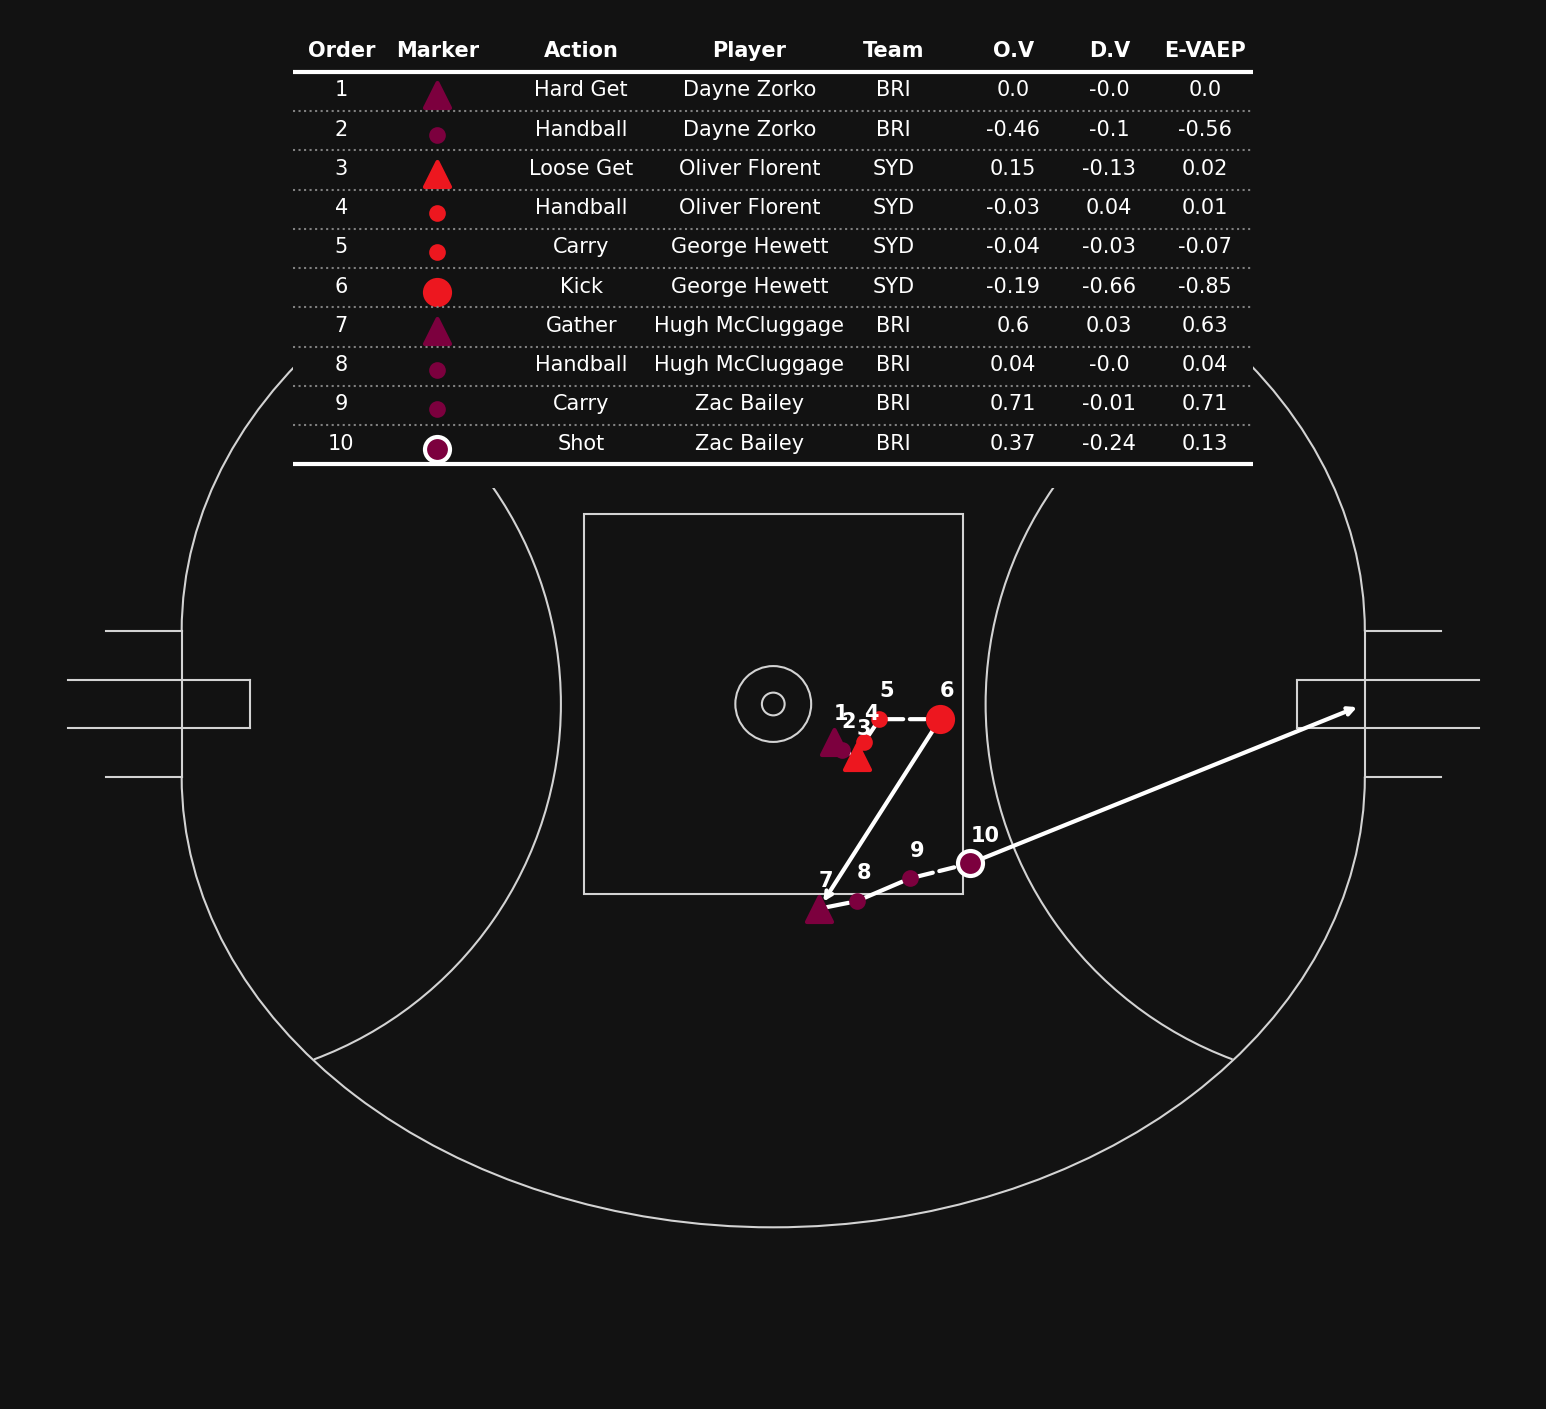

In [8]:
match_id = "202101_BrisbaneLions_Sydney"
chain_number = 1
chain = get_chain(chain_data, match_id, chain_number)
pitch_length, pitch_width = get_venue_dimensions(chain, match_id)
pitch = Pitch(pitch_width=pitch_width, pitch_length=pitch_length, line_width = 0.5)
fig, ax = pitch.draw()
ax = plot_chain_vaep(chain, pitch, ax=ax)
ax_table = add_chain_table_vaep(chain, fig, left=0.25, bottom=0.65, width=0.5, height=0.3)

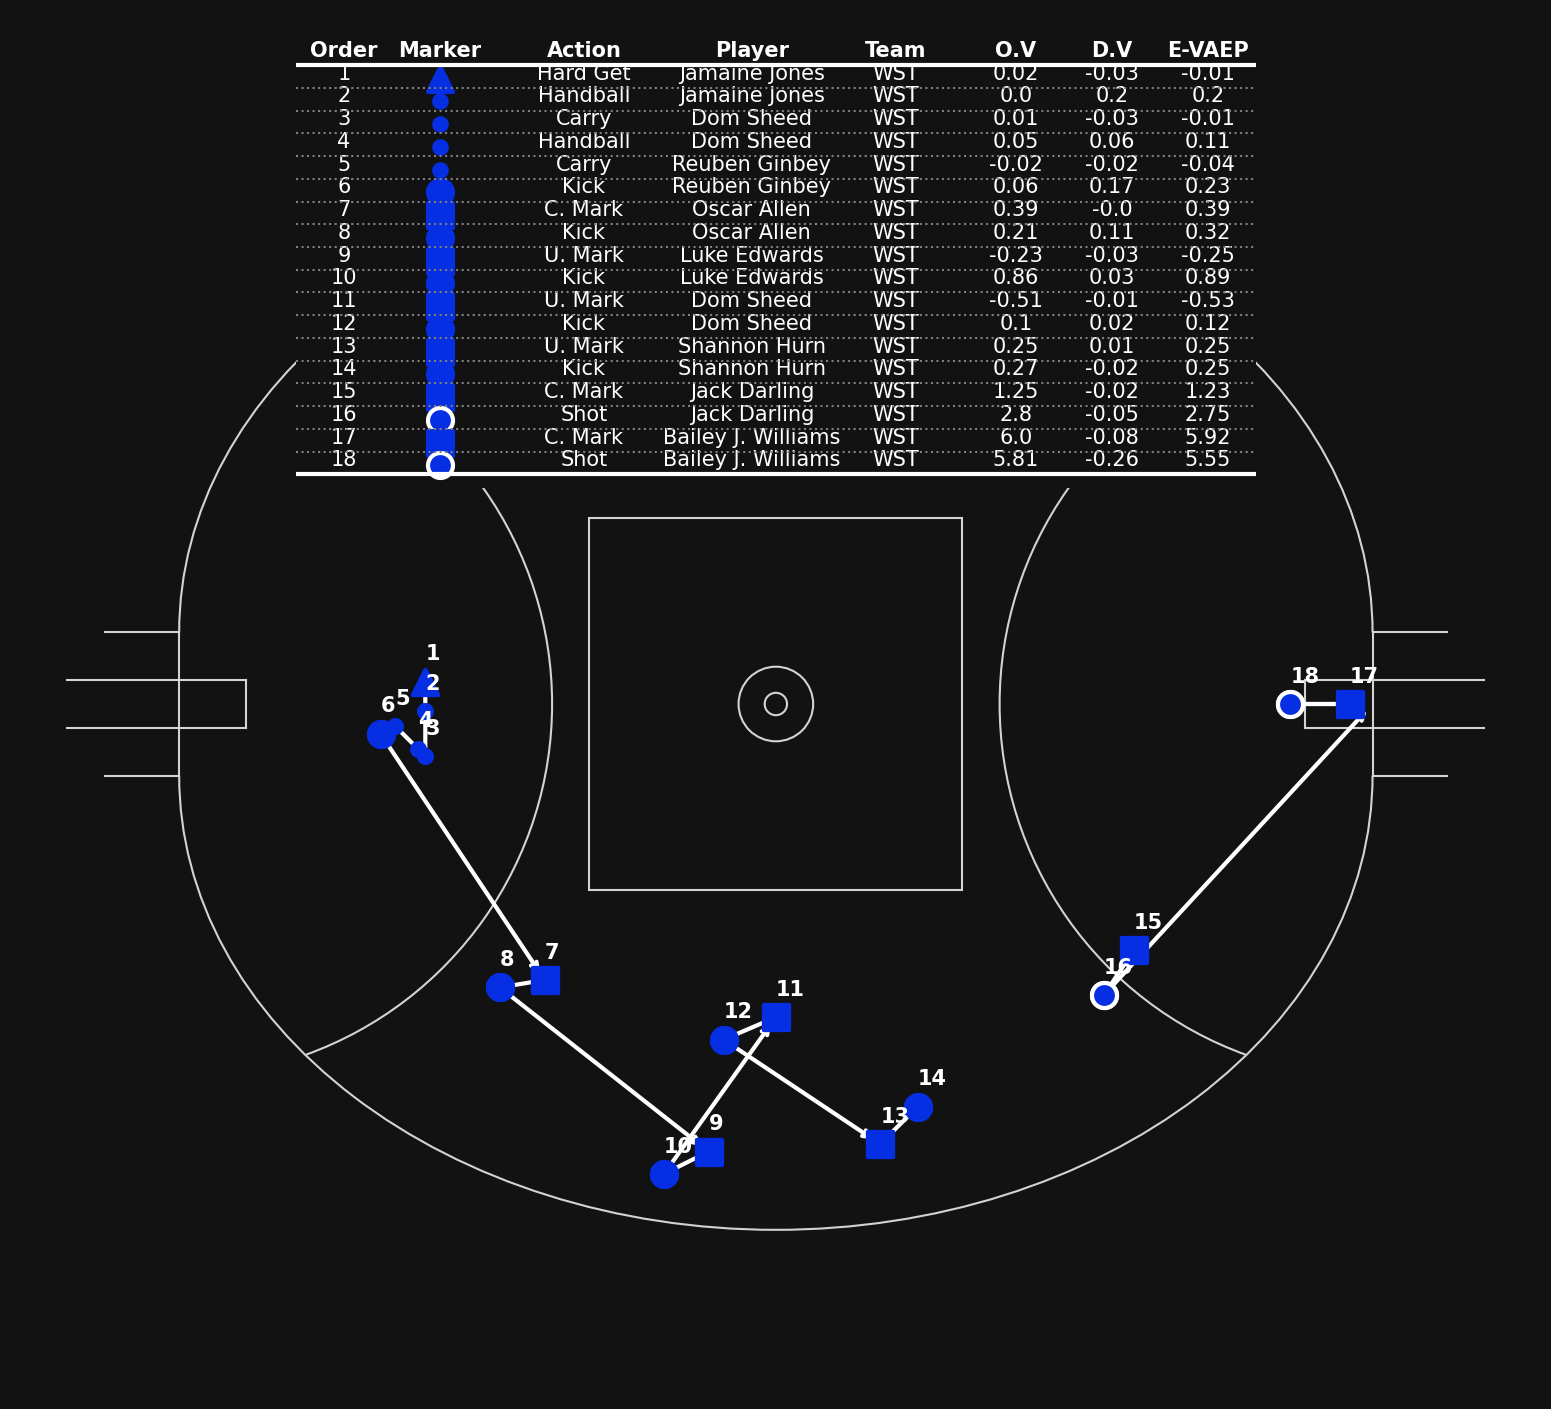

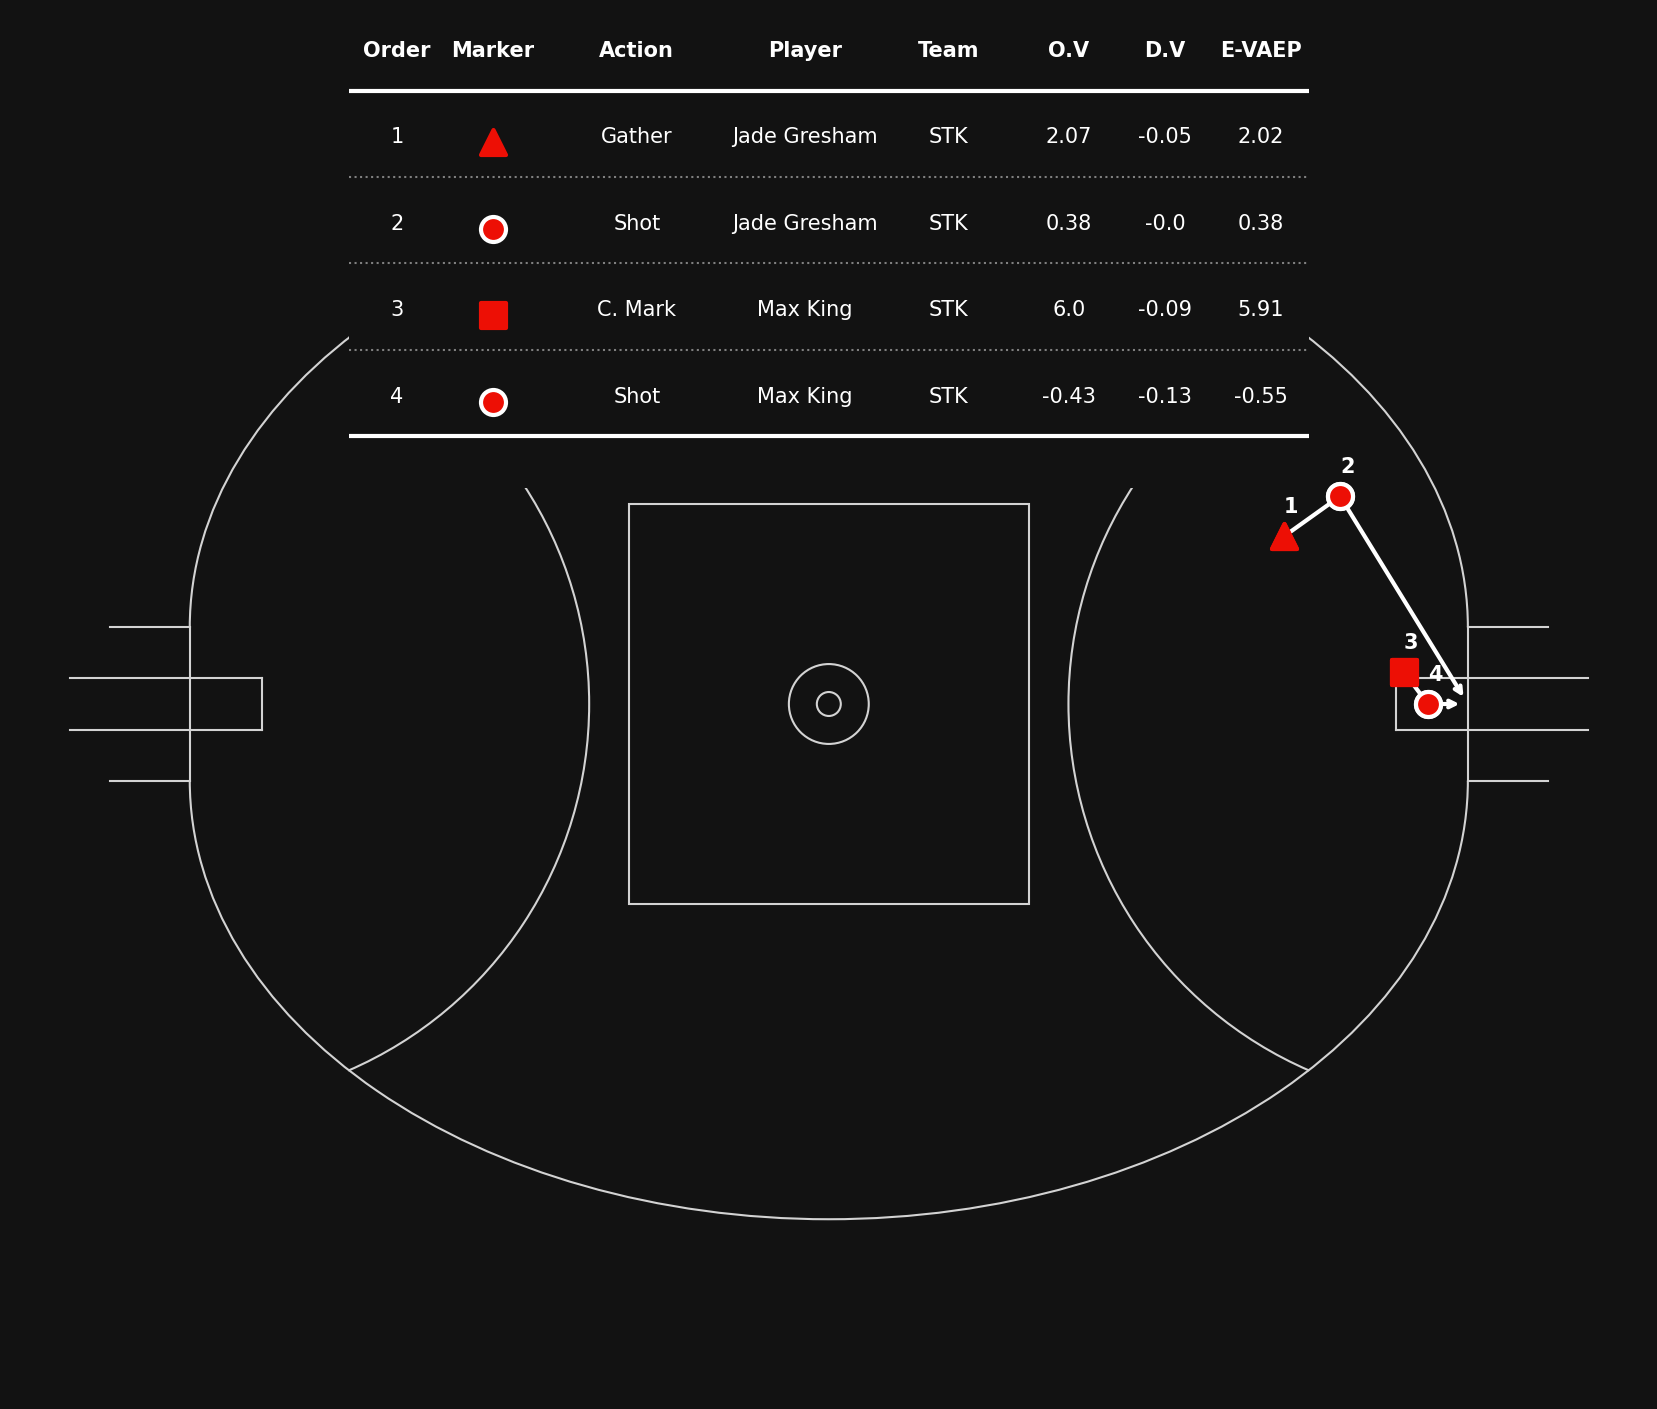

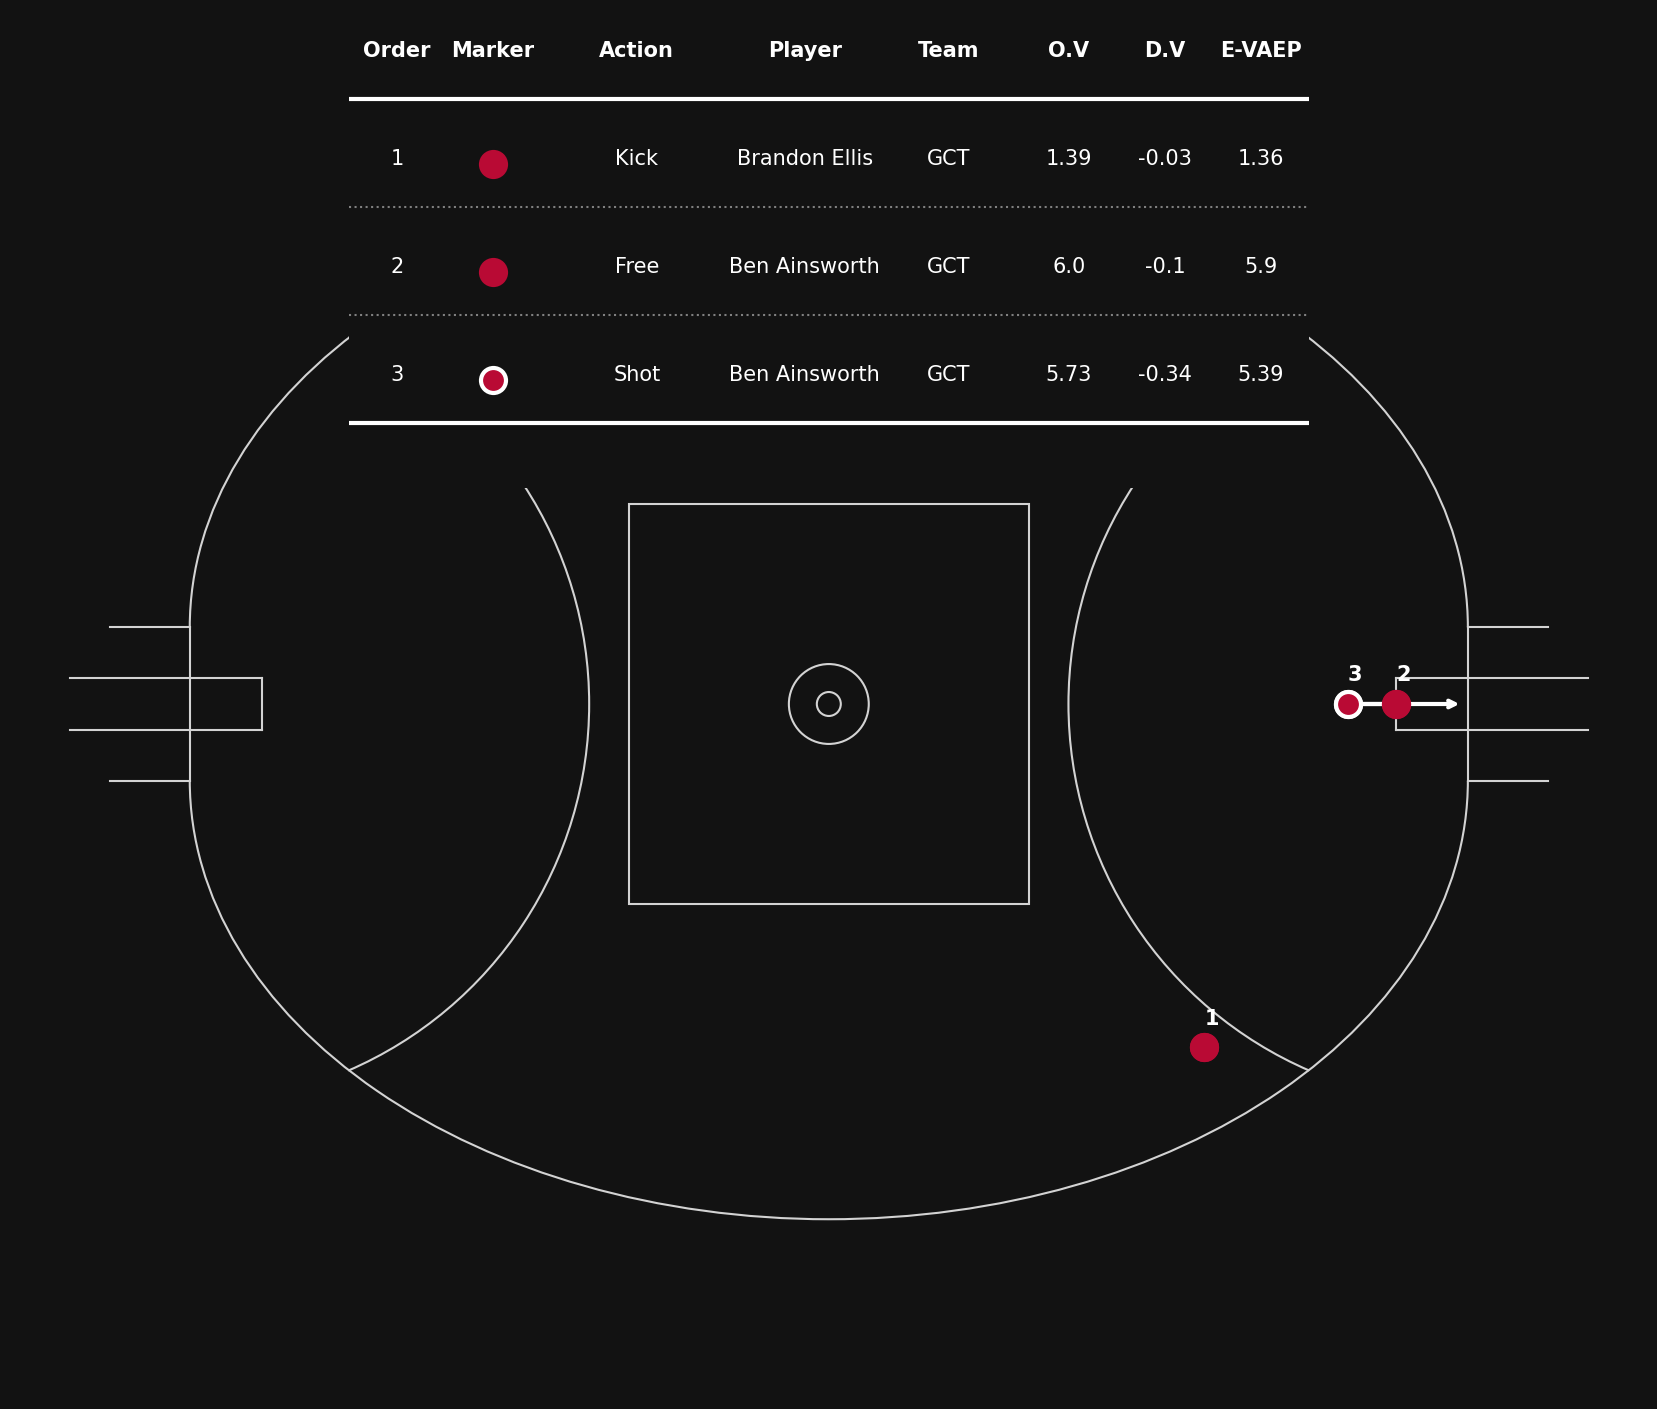

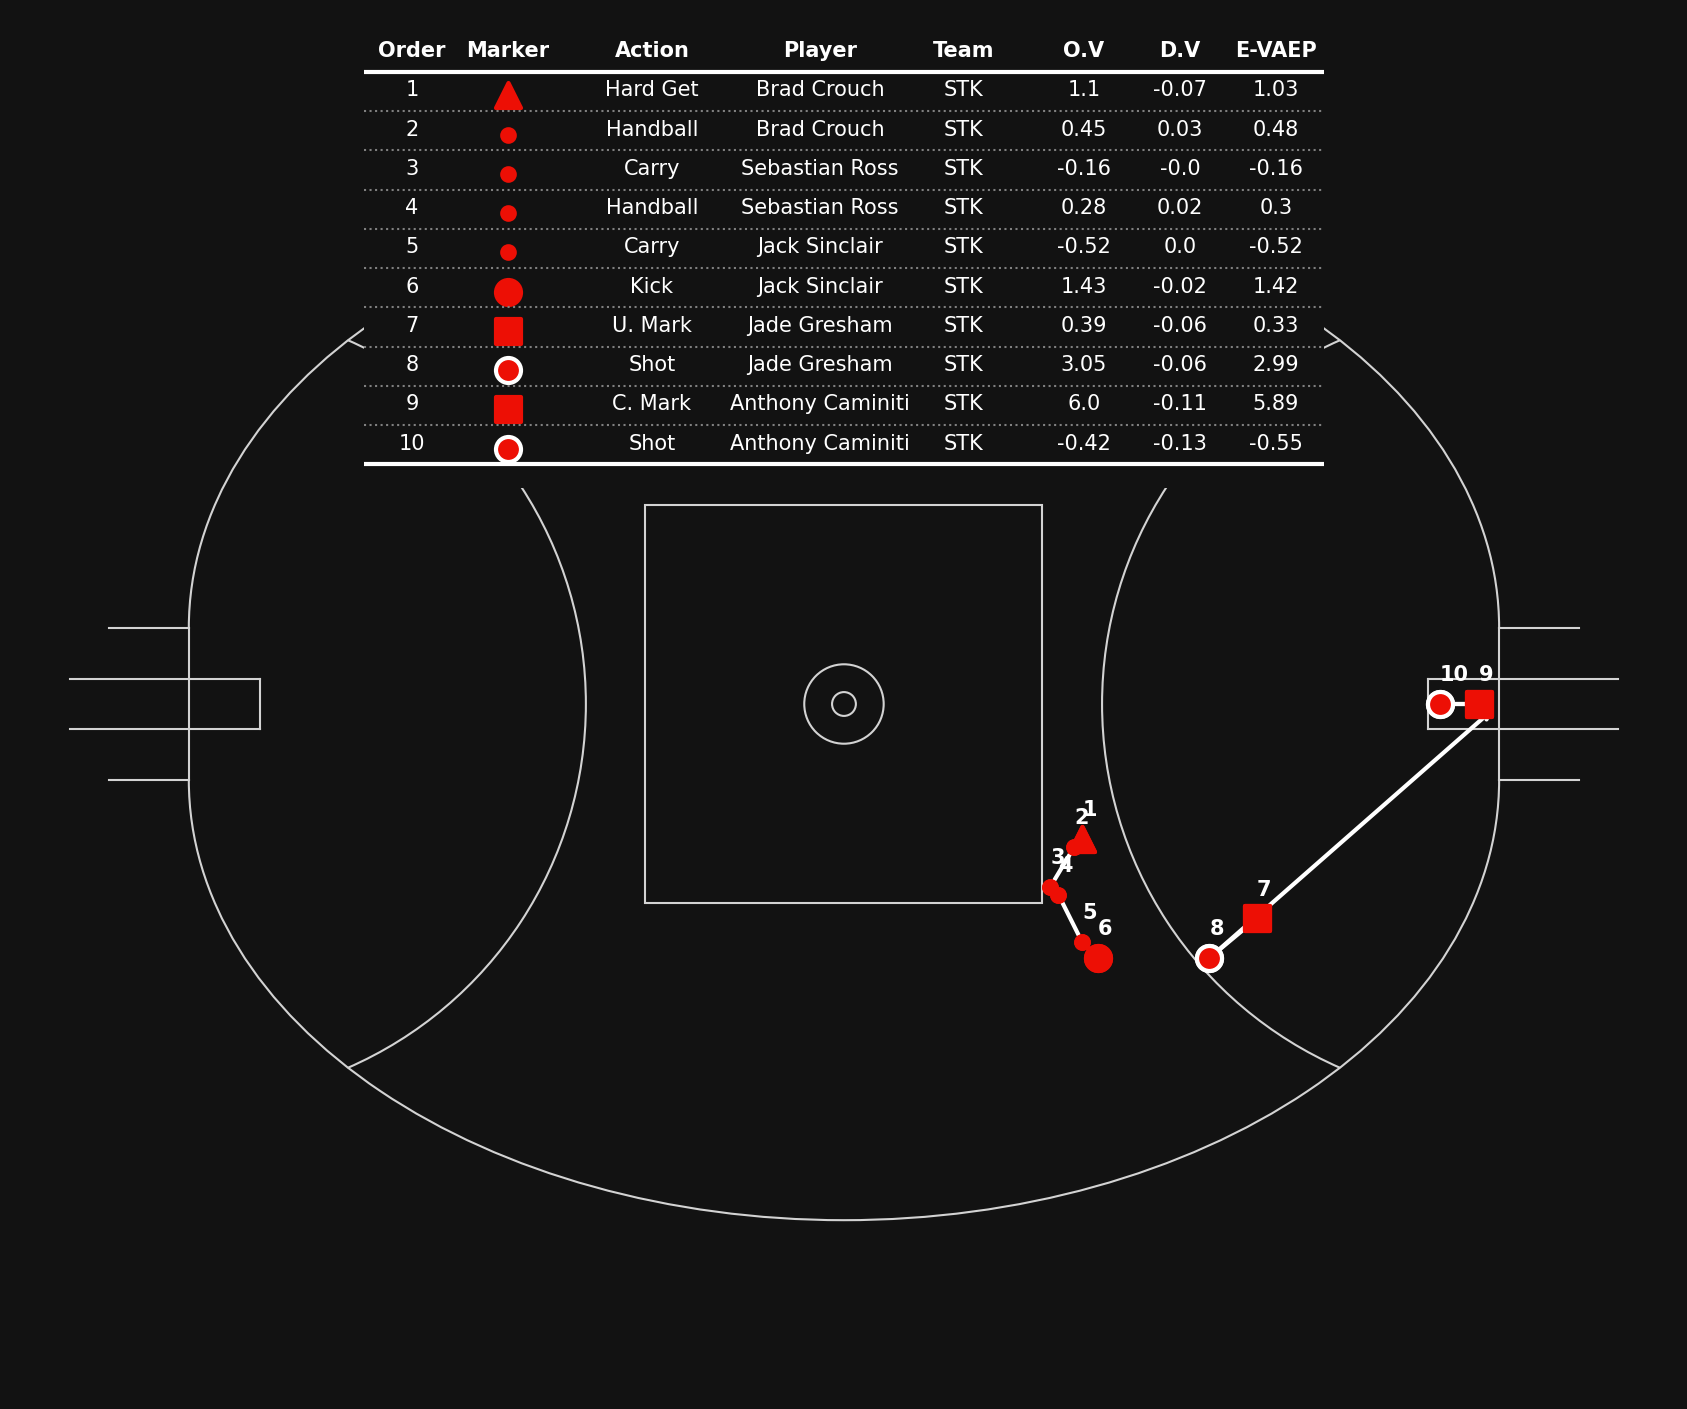

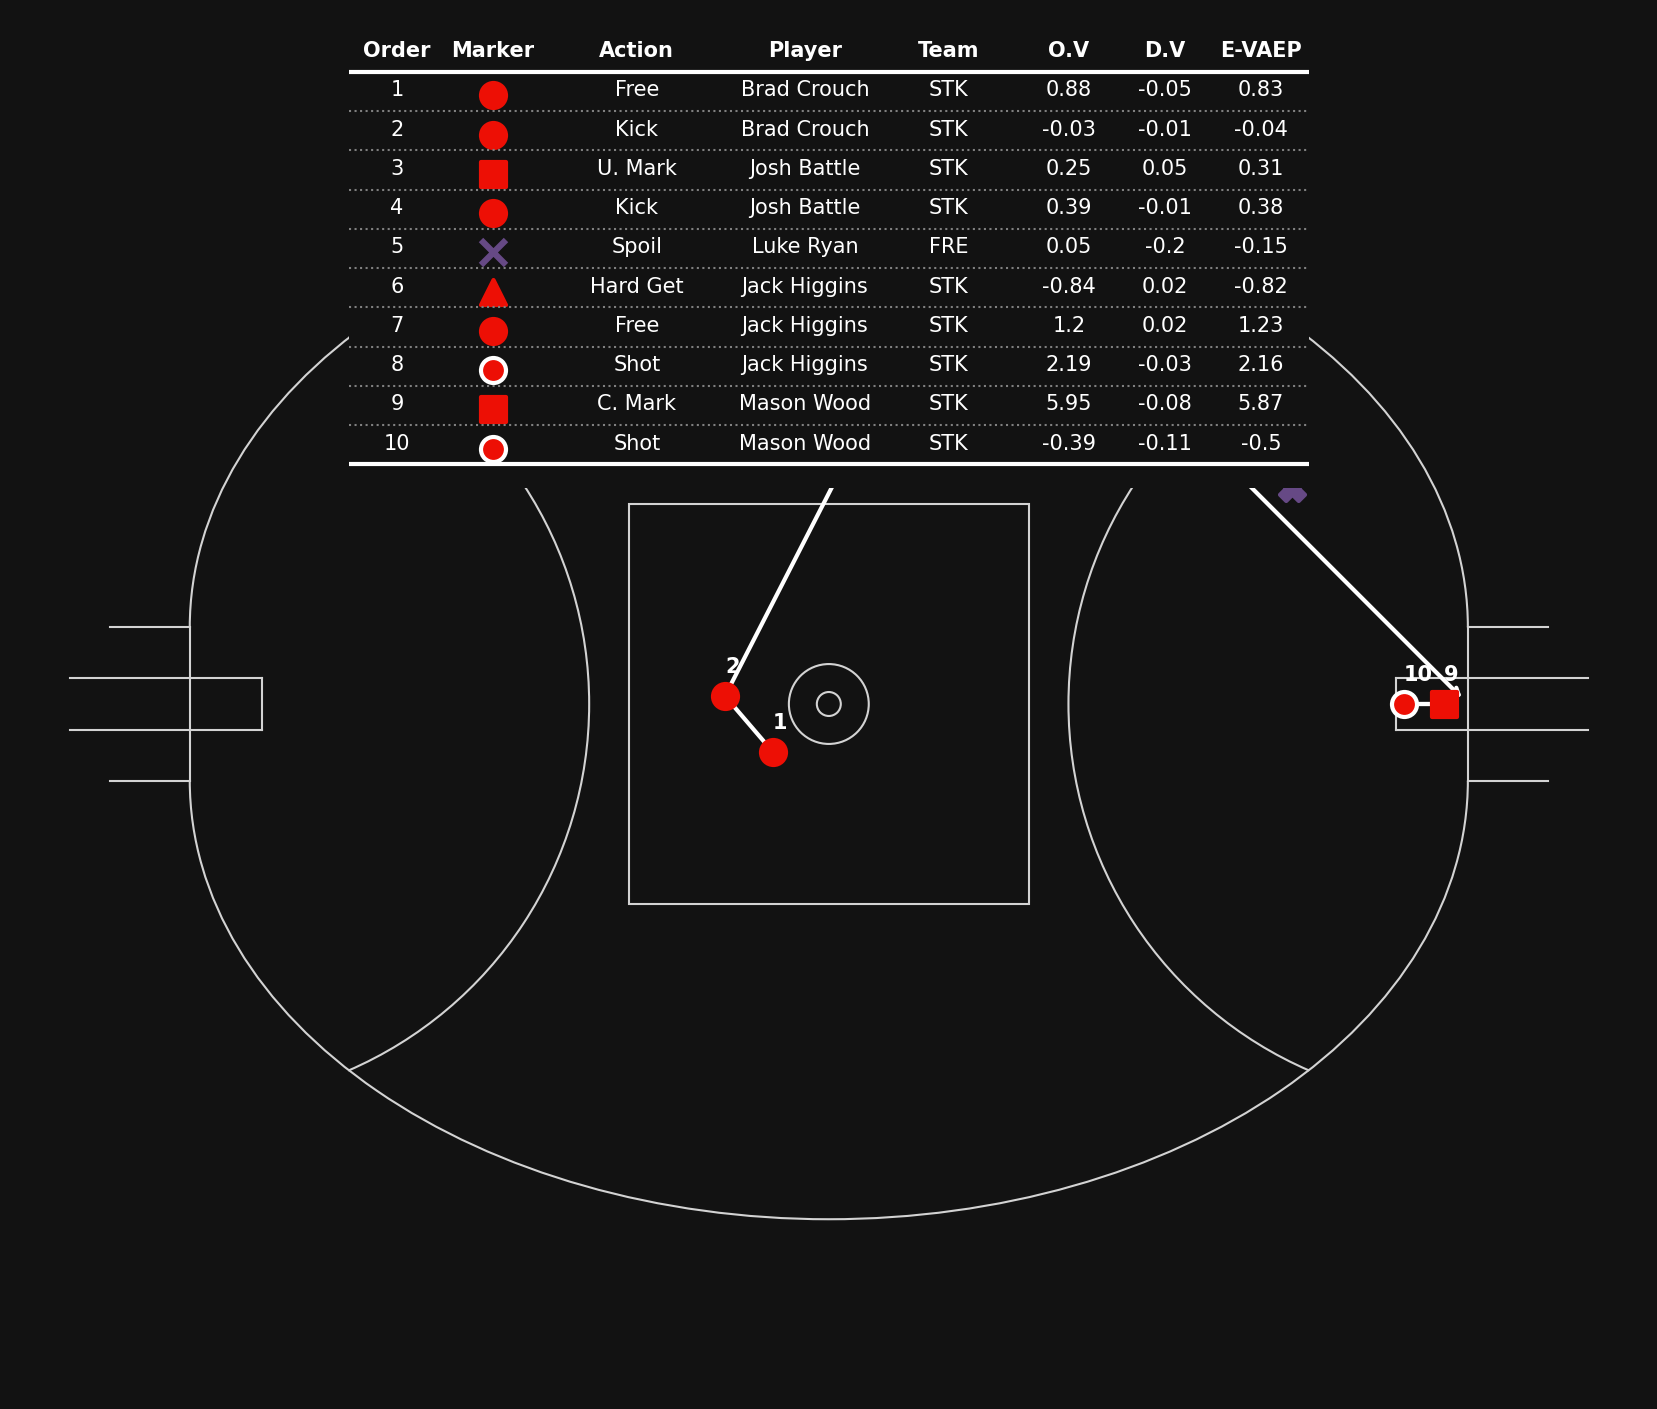

In [9]:
top_vaep_actions = chain_data.sort_values('exp_vaep_value', ascending = False).head(5)
top_vaep_matches = list(top_vaep_actions['match_id'])
top_vaep_chain_numbers = list(top_vaep_actions['chain_number'])
for index in range(0, 5):
    match_id = top_vaep_matches[index]
    chain_number = top_vaep_chain_numbers[index]
    
    chain = get_chain(chain_data, match_id, chain_number)
    pitch_length, pitch_width = get_venue_dimensions(chain, match_id)
    
    pitch = Pitch(pitch_width=pitch_width, pitch_length=pitch_length, line_width = 0.5)
    fig, ax = pitch.draw()
    ax = plot_chain_vaep(chain, pitch, ax=ax)
    ax_table = add_chain_table_vaep(chain, fig, left=0.25, bottom=0.65, width=0.5, height=0.3)

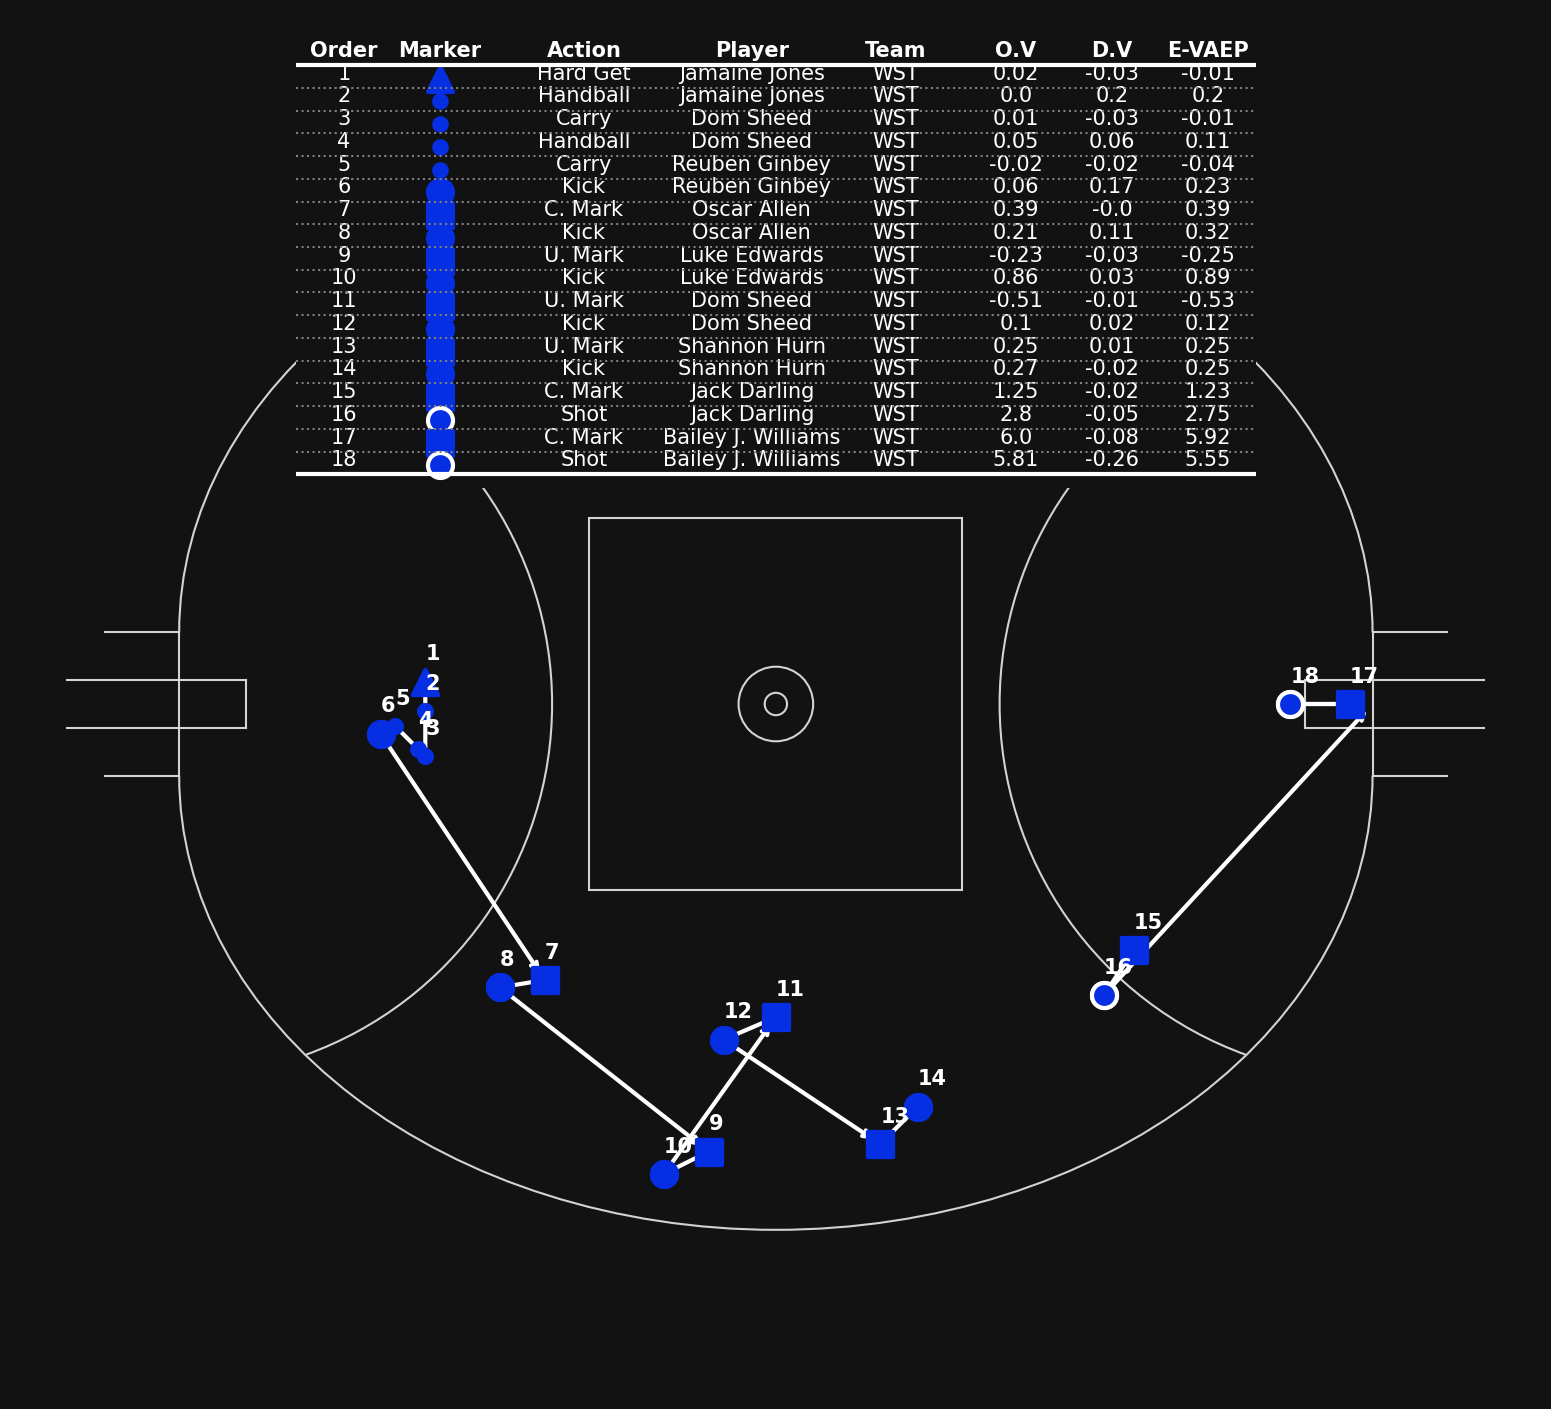

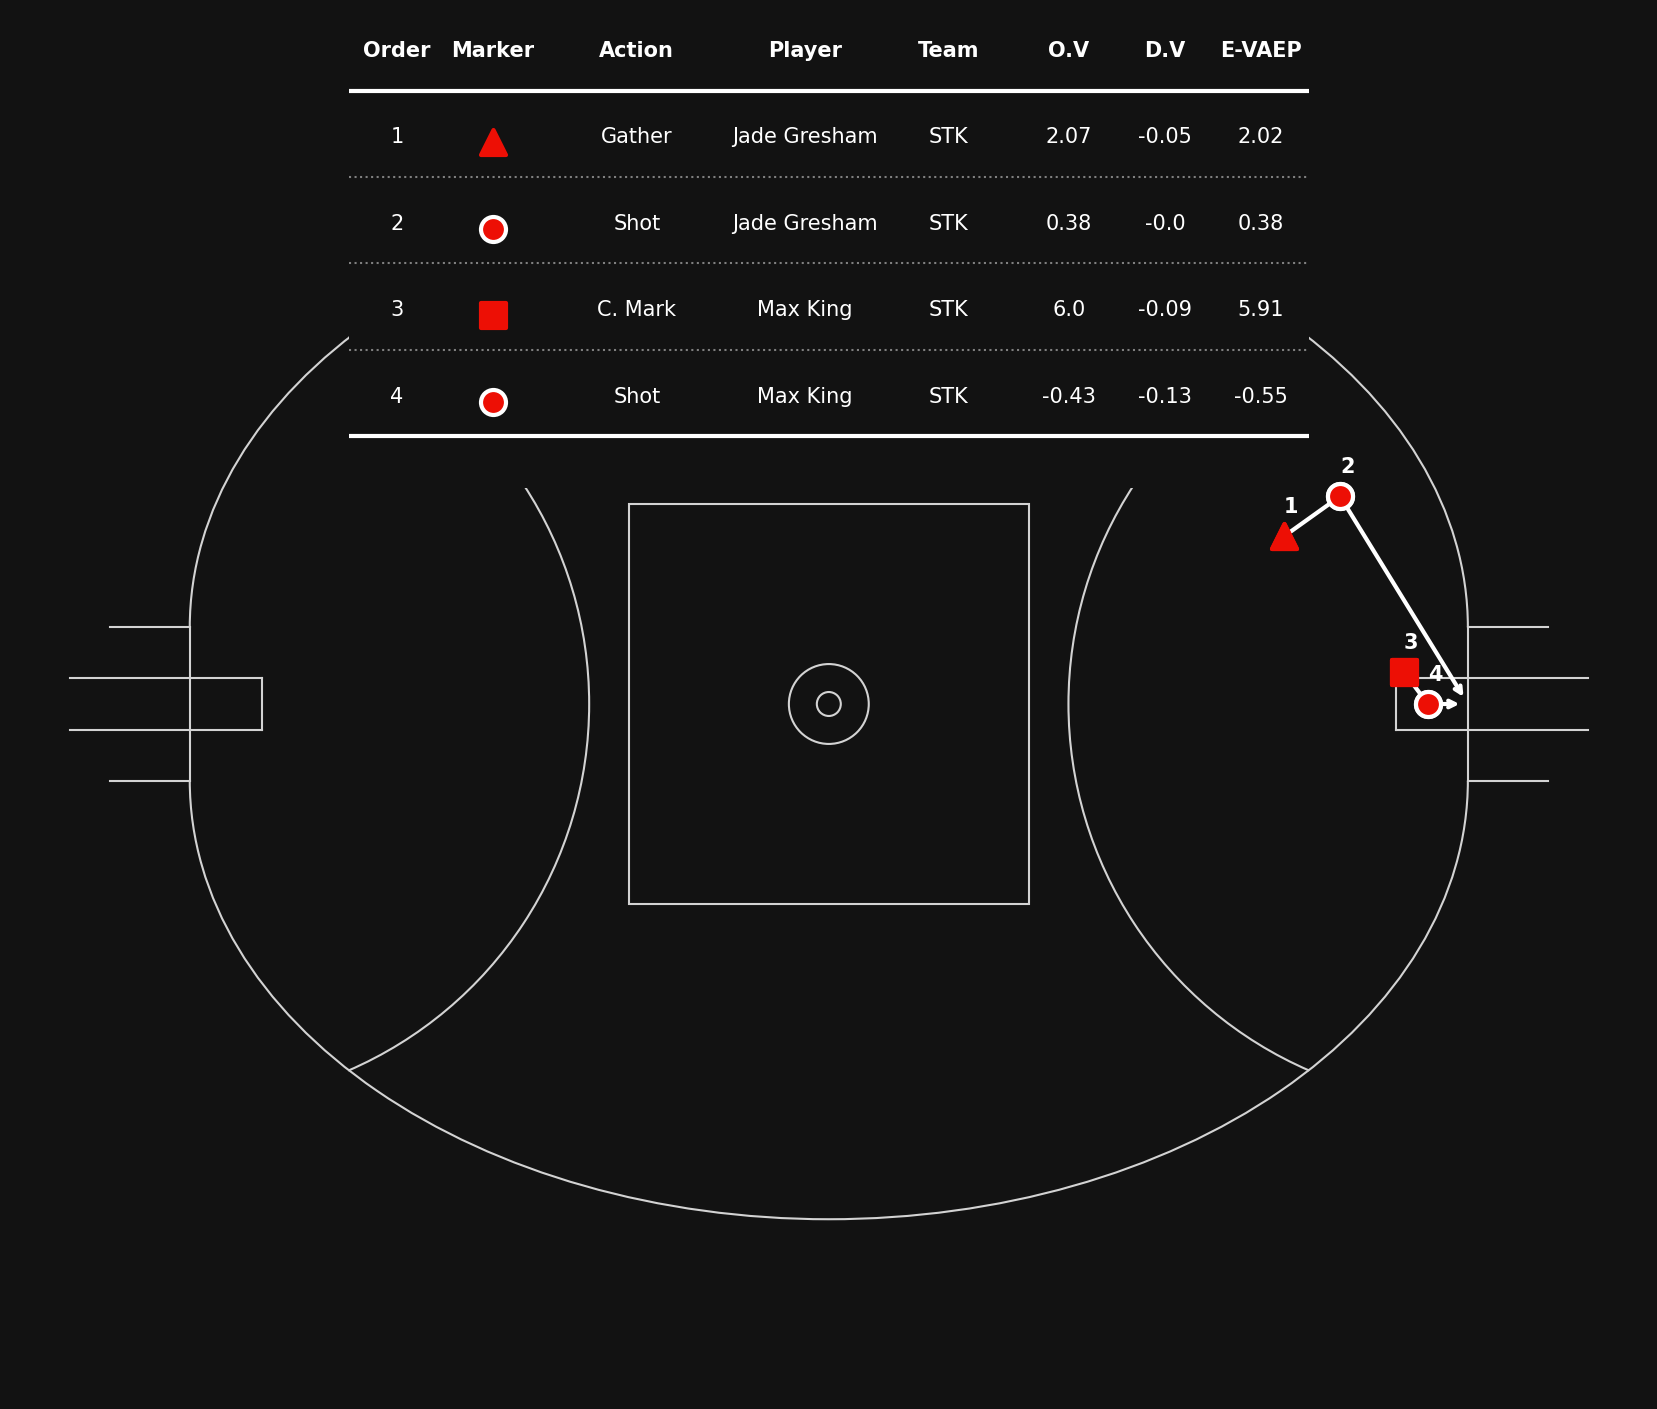

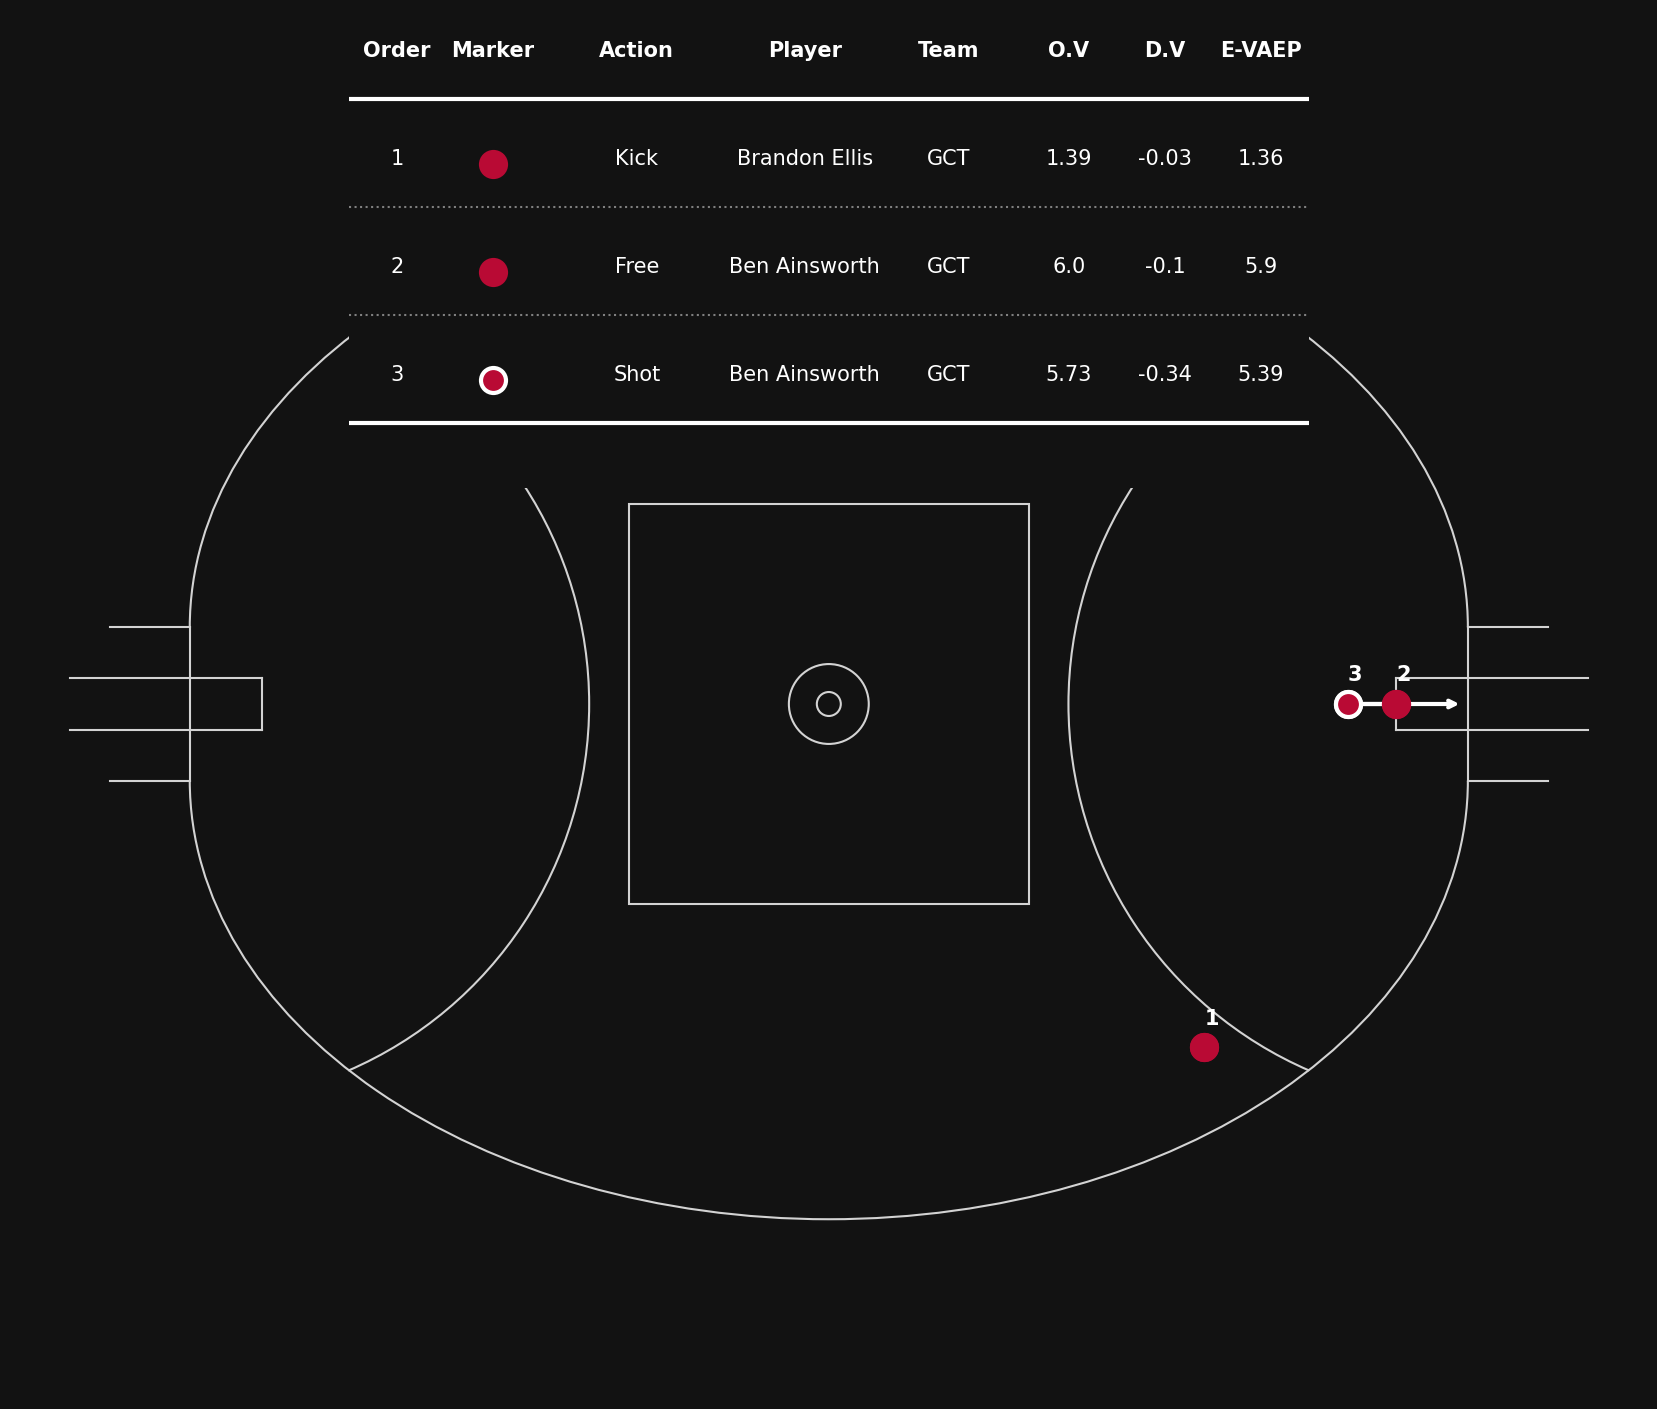

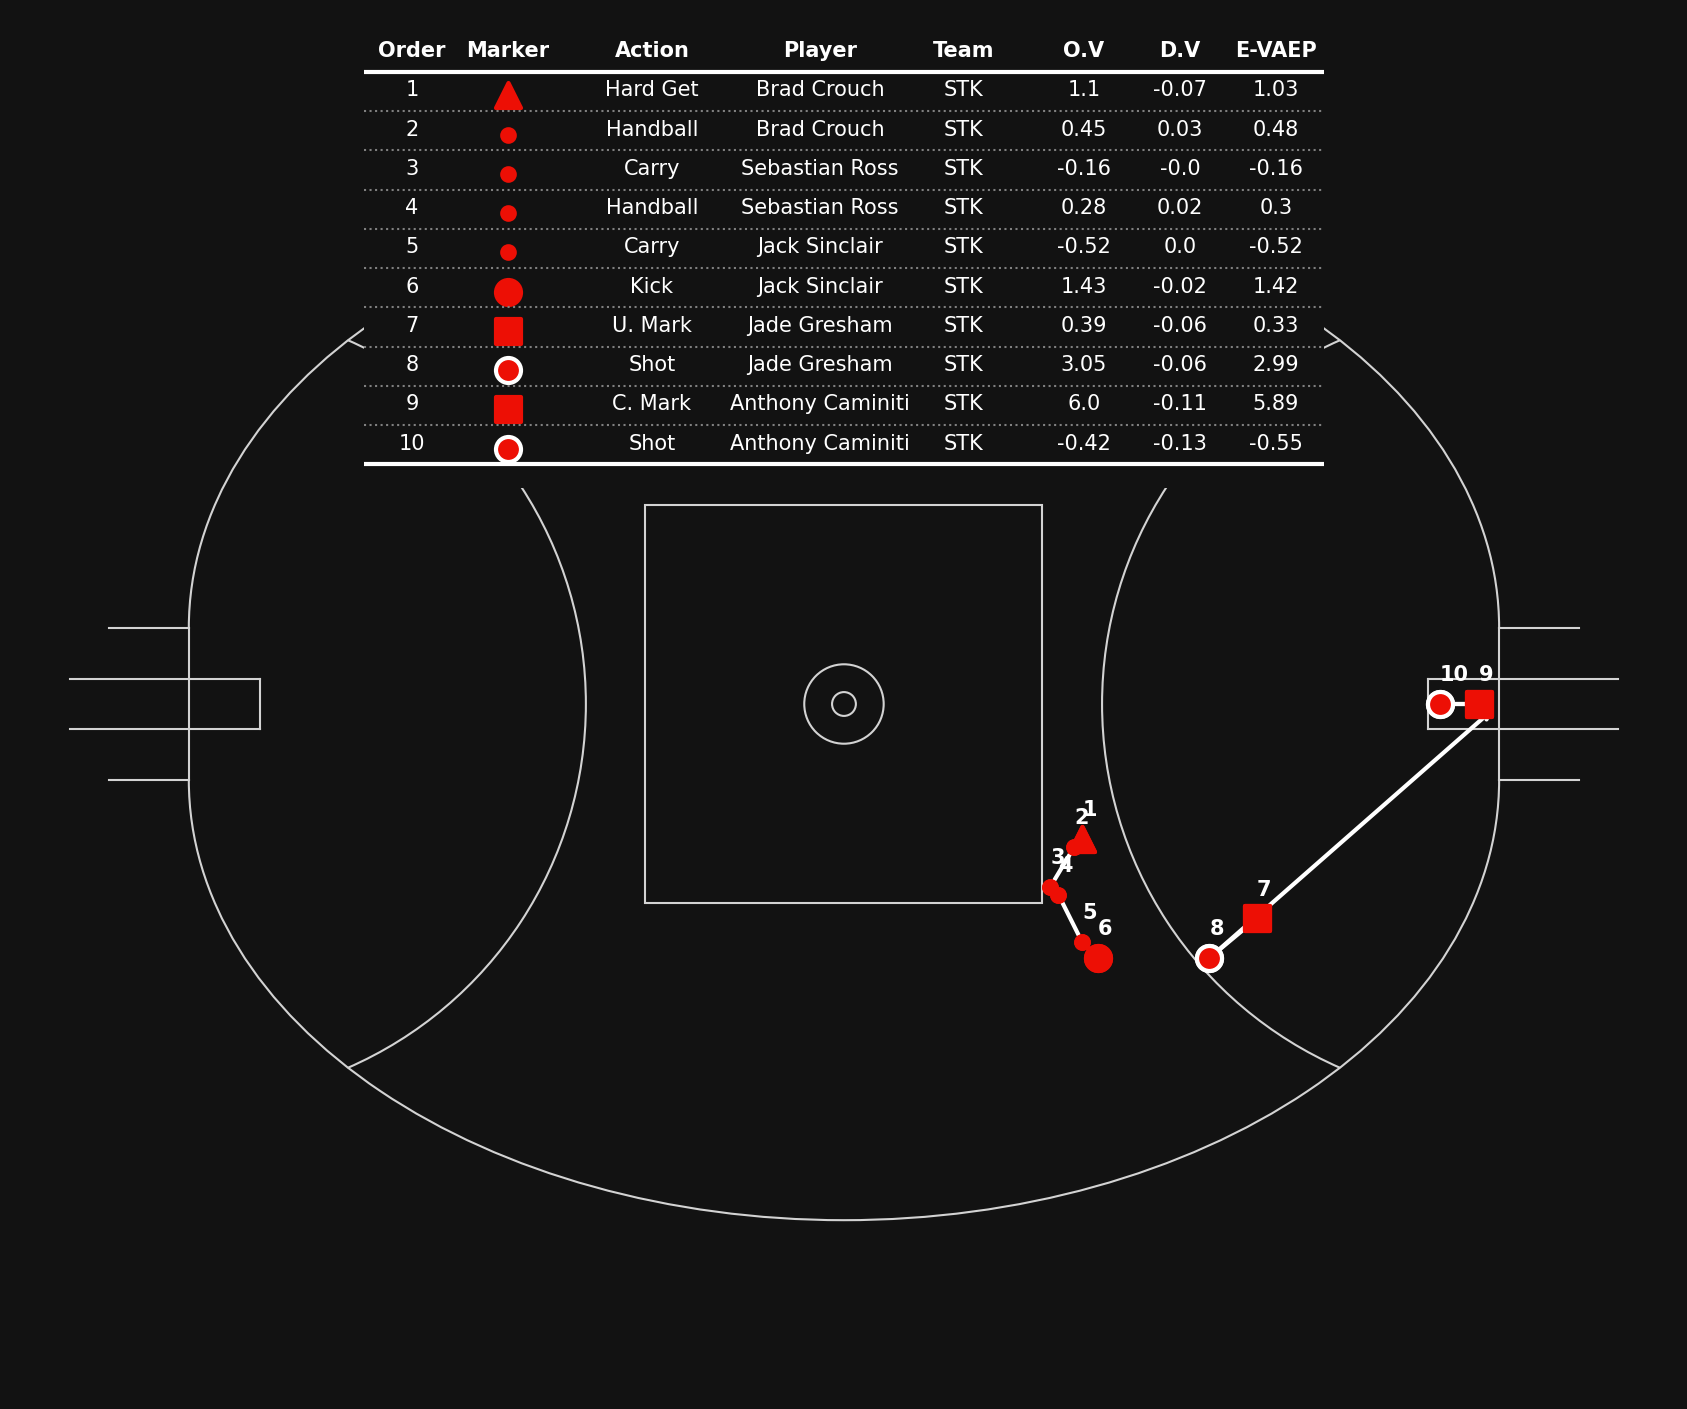

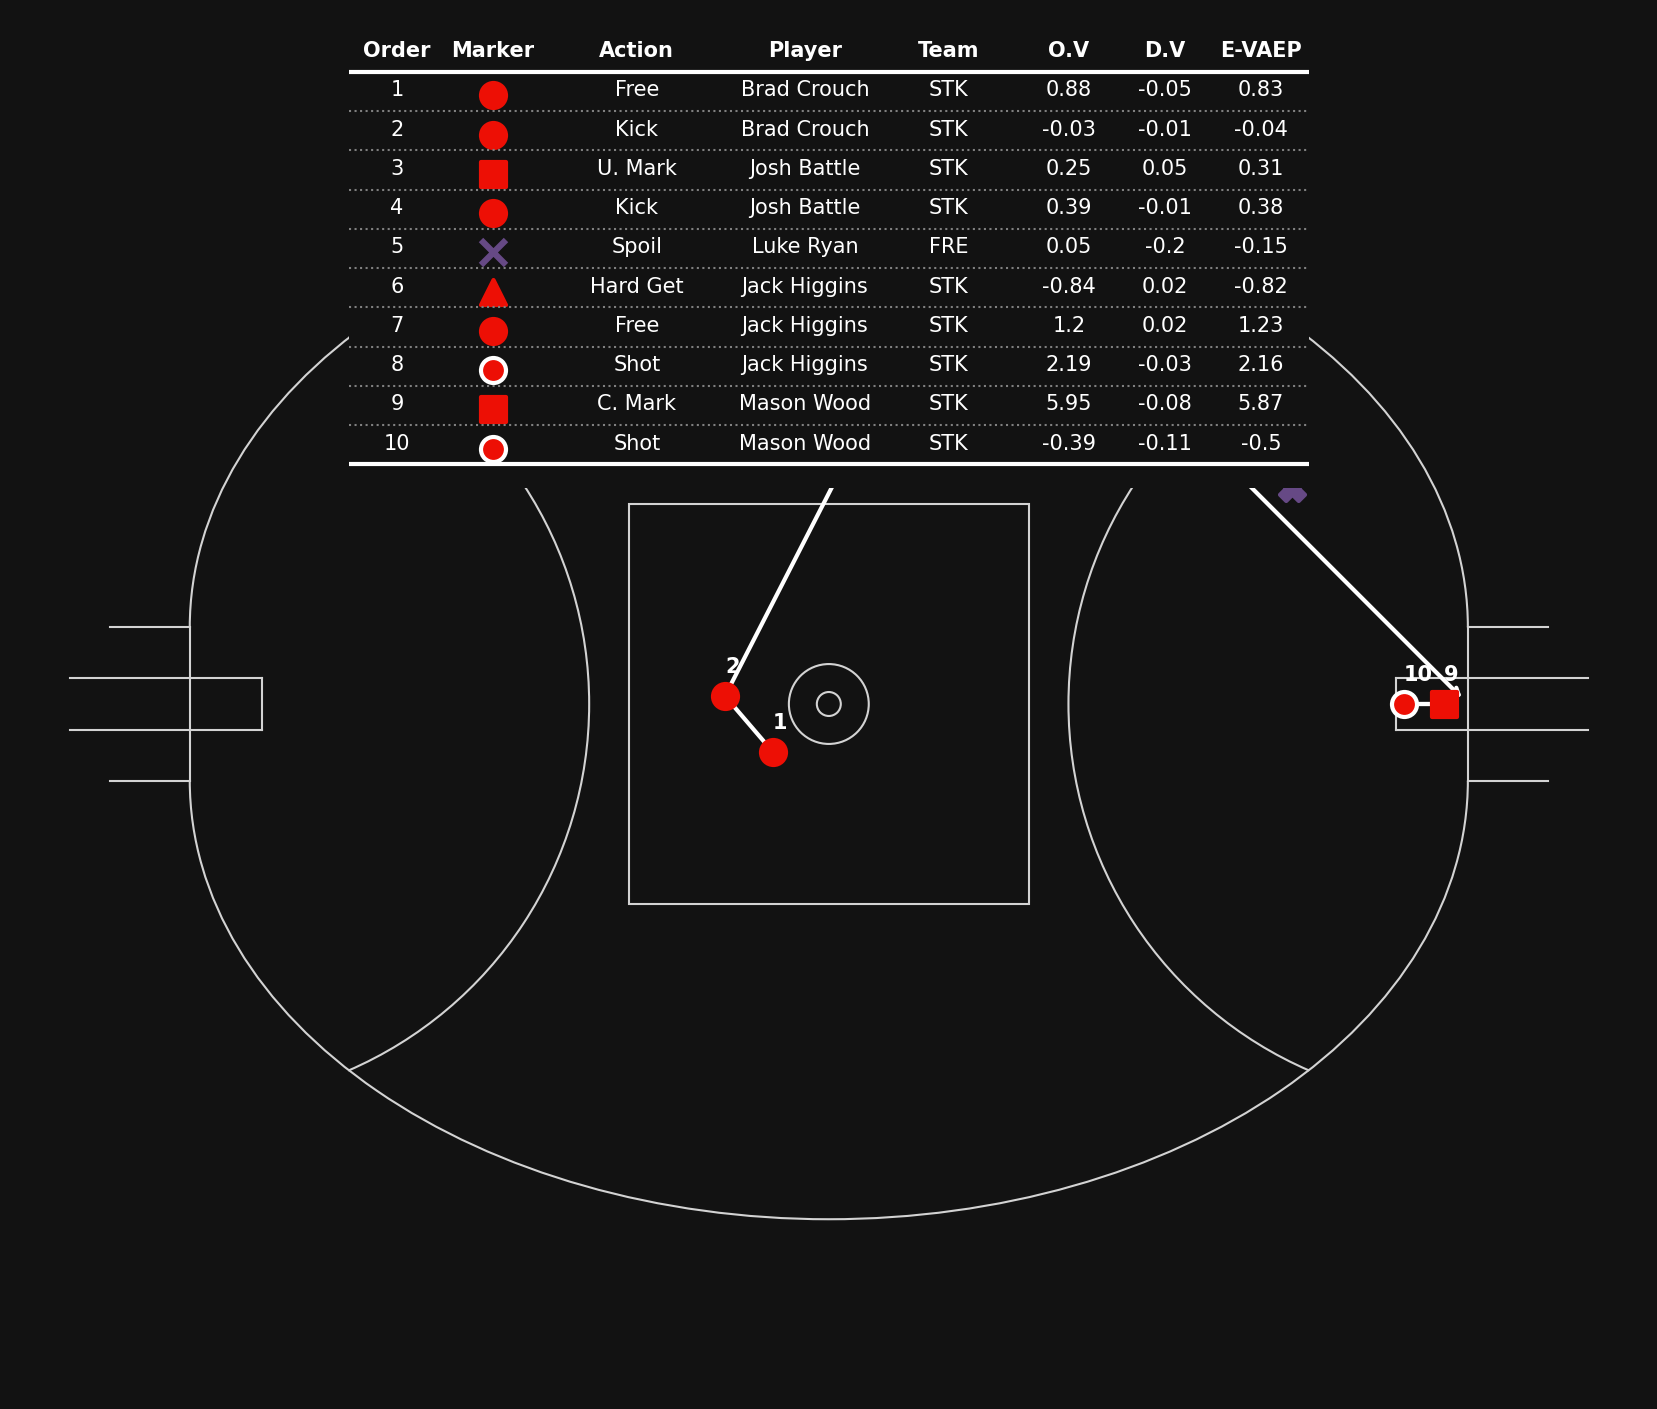

In [10]:
top_vaep_nonshot_actions = chain_data[~(chain_data['action_type'] == "Shot")].sort_values('exp_vaep_value', ascending = False).head(5)
top_vaep_matches = list(top_vaep_nonshot_actions['match_id'])
top_vaep_chain_numbers = list(top_vaep_nonshot_actions['chain_number'])
for index in range(0, 5):
    match_id = top_vaep_matches[index]
    chain_number = top_vaep_chain_numbers[index]
    chain = get_chain(chain_data, match_id, chain_number)
    pitch_length, pitch_width = get_venue_dimensions(chain, match_id)
    
    pitch = Pitch(pitch_width=pitch_width, pitch_length=pitch_length, line_width = 0.5)
    fig, ax = pitch.draw()
    ax = plot_chain_vaep(chain, pitch, ax=ax)
    ax_table = add_chain_table_vaep(chain, fig, left=0.25, bottom=0.65, width=0.5, height=0.3)

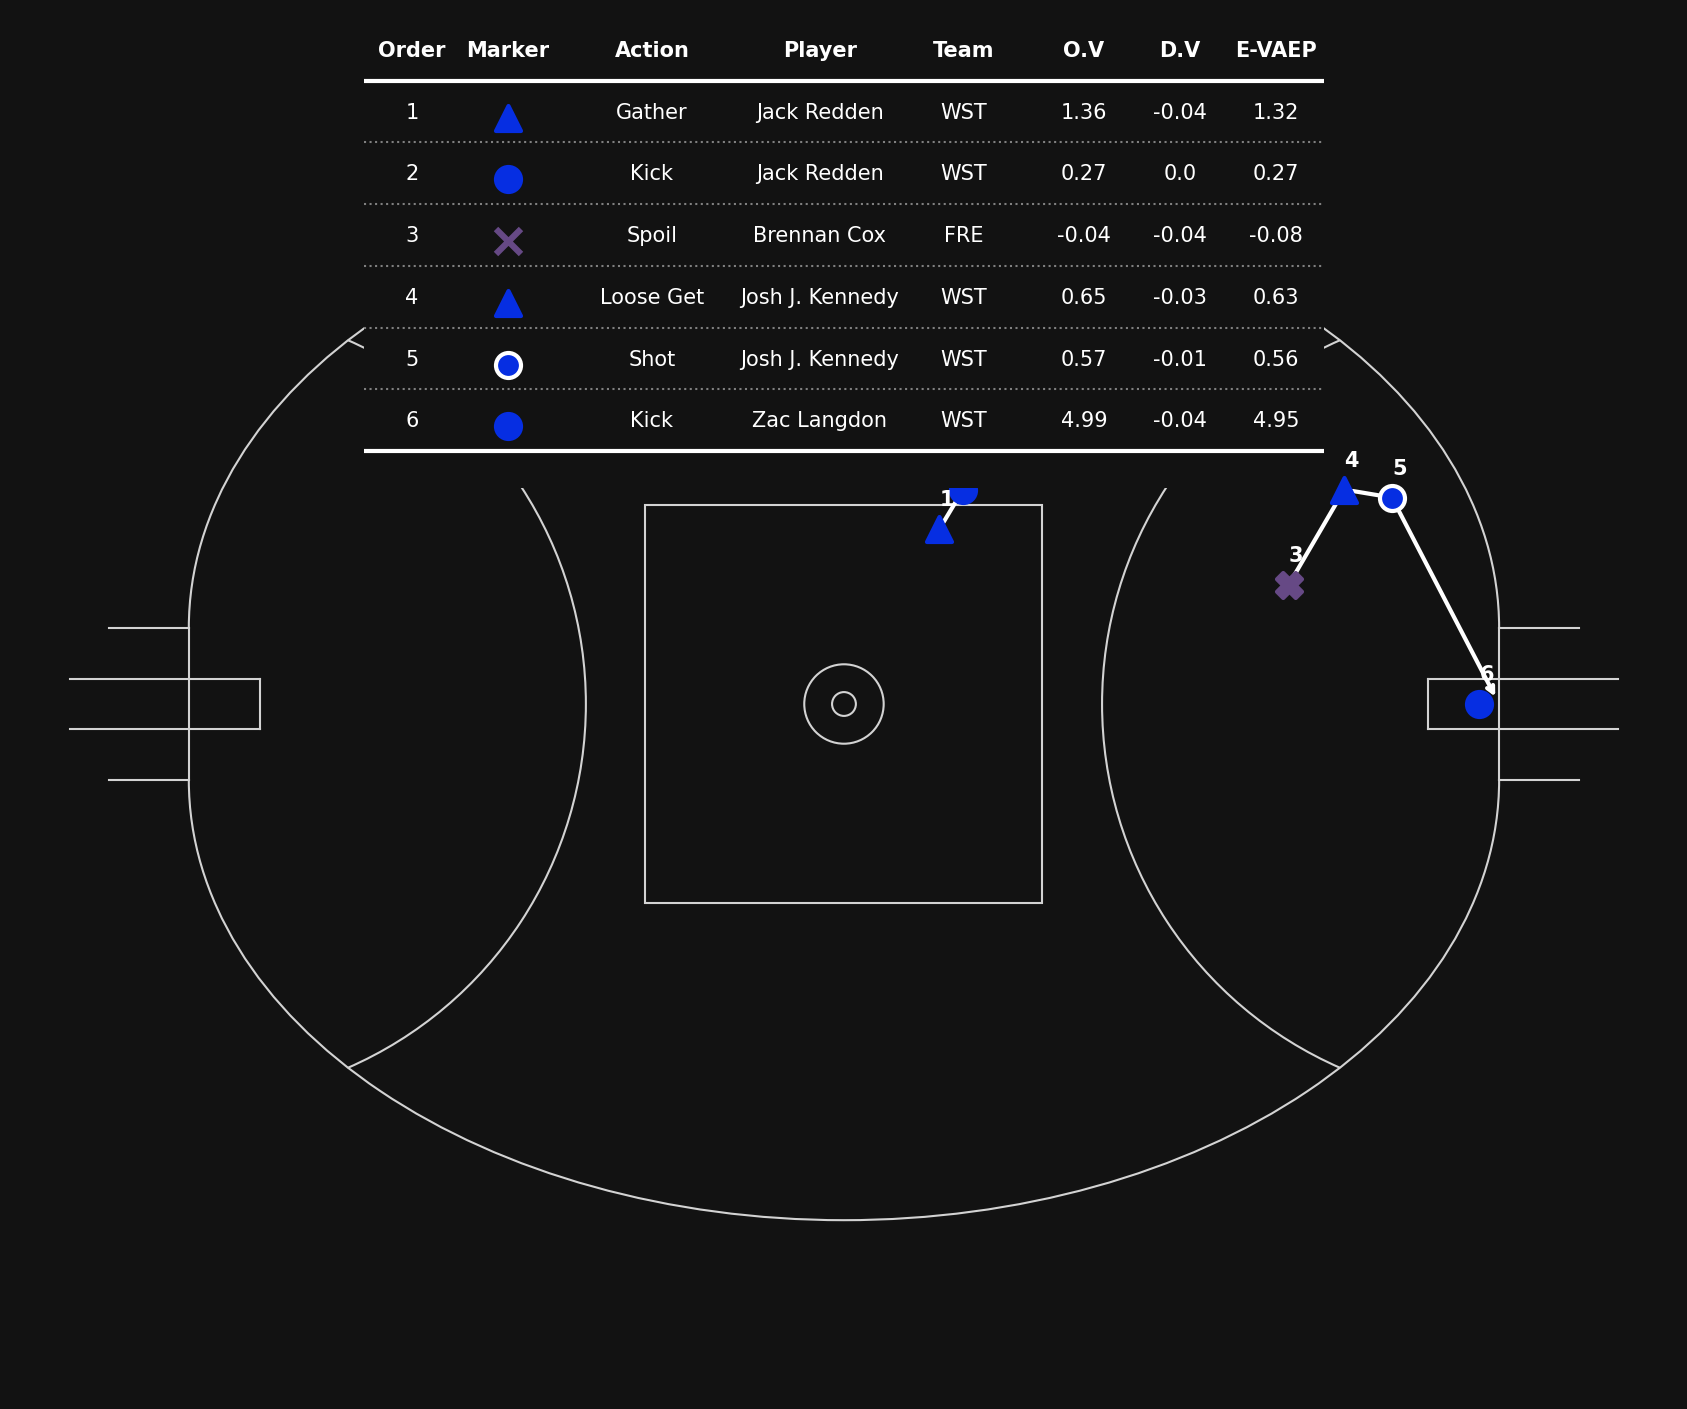

In [12]:
top_vaep_kick_actions = chain_data[(chain_data['action_type'] == "Kick")].sort_values('exp_vaep_value', ascending = False).head(5)
top_vaep_matches = list(top_vaep_kick_actions['match_id'])
top_vaep_chain_numbers = list(top_vaep_kick_actions['chain_number'])
for index in range(0, 1):
    match_id = top_vaep_matches[index]
    chain_number = top_vaep_chain_numbers[index]
    chain = get_chain(chain_data, match_id, chain_number)
    pitch_length, pitch_width = get_venue_dimensions(chain, match_id)
    
    pitch = Pitch(pitch_width=pitch_width, pitch_length=pitch_length, line_width = 0.5)
    fig, ax = pitch.draw()
    ax = plot_chain_vaep(chain, pitch, ax=ax)
    ax_table = add_chain_table_vaep(chain, fig, left=0.25, bottom=0.65, width=0.5, height=0.3)

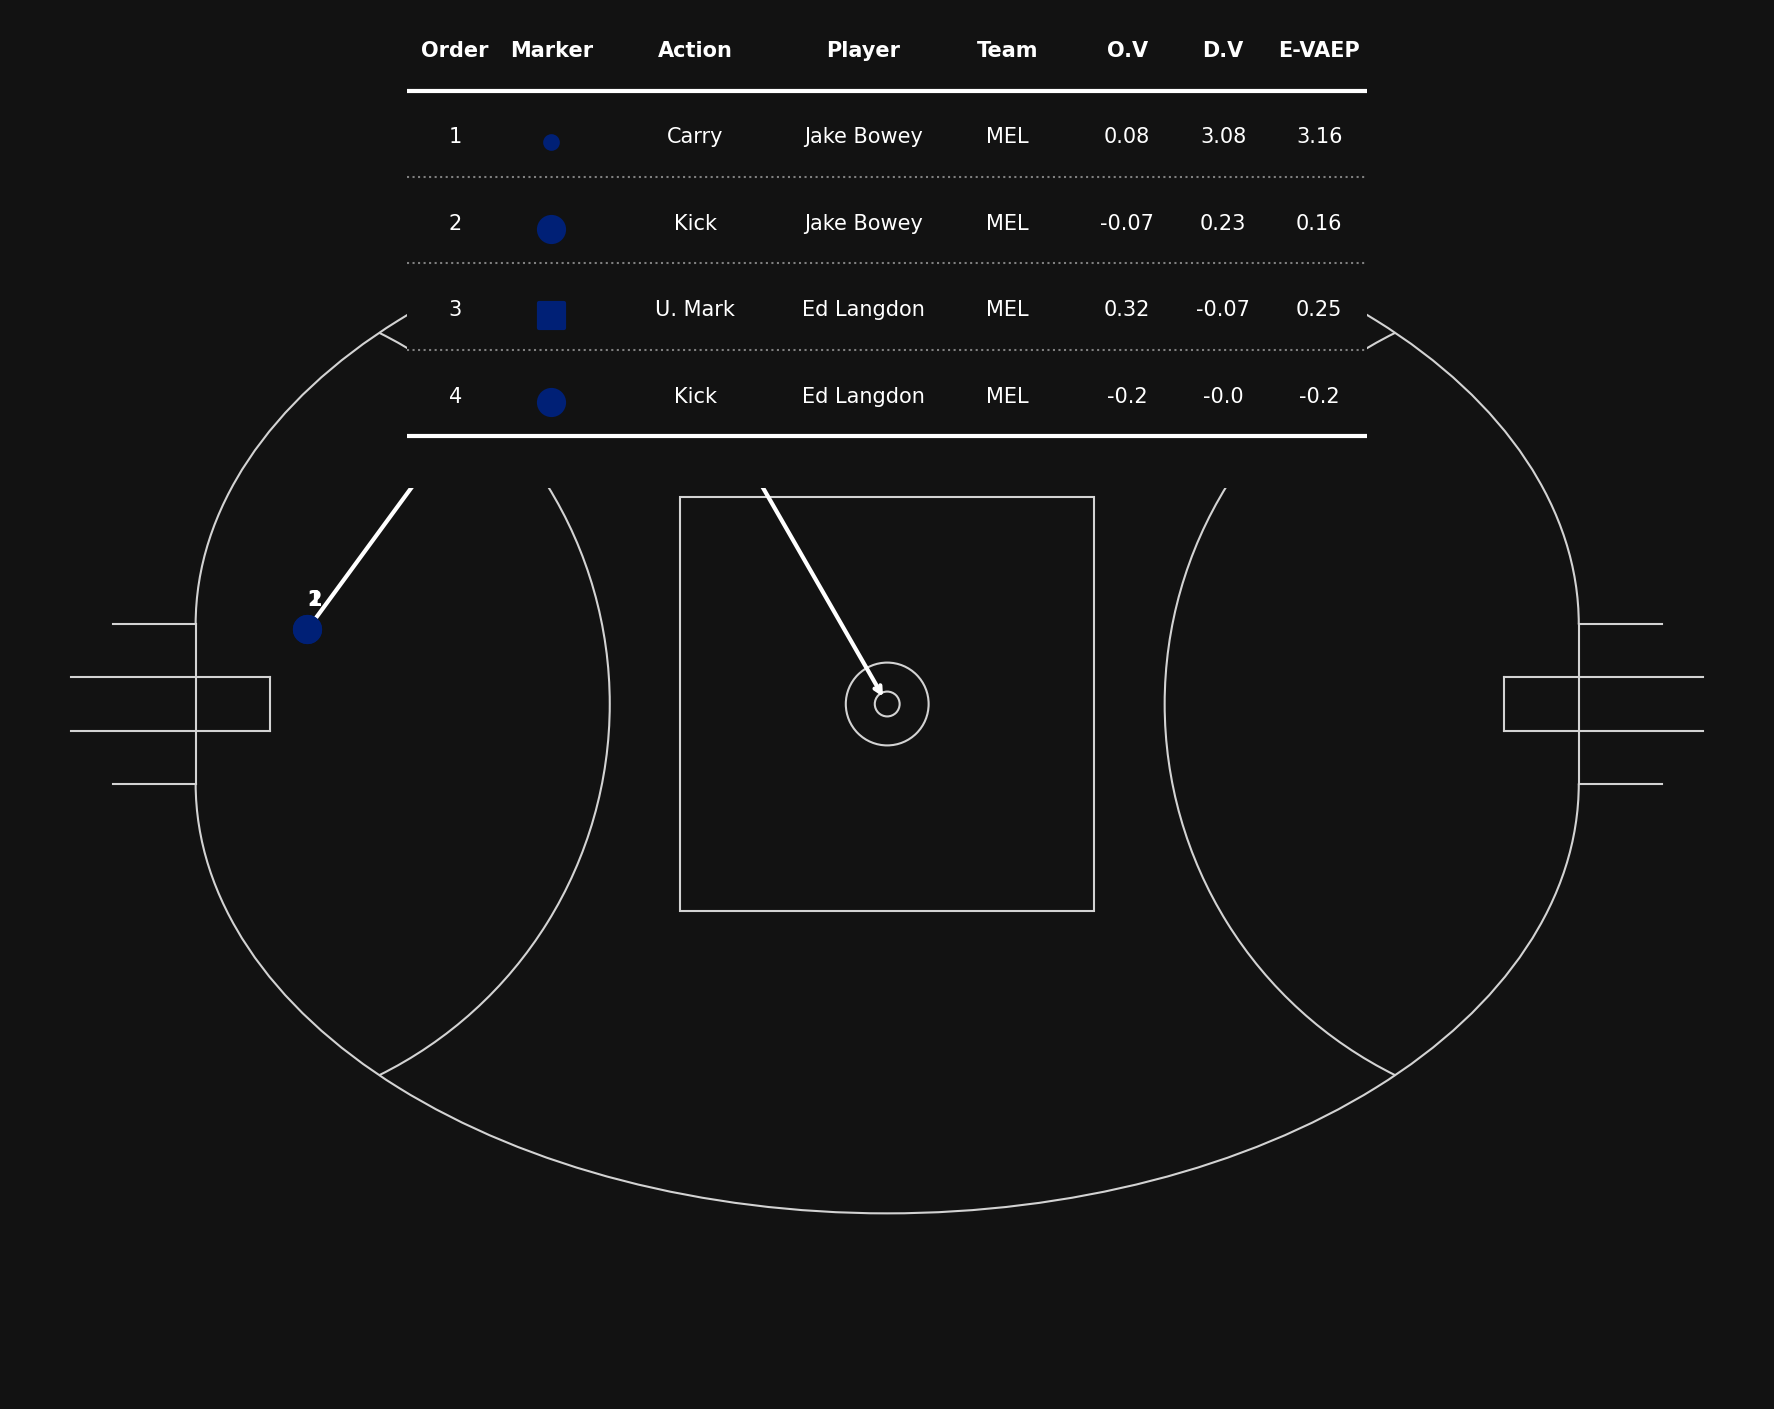

In [13]:
top_vaep_carry_actions = chain_data[(chain_data['action_type'] == "Carry")].sort_values('exp_vaep_value', ascending = False).head(5)
top_vaep_matches = list(top_vaep_carry_actions['match_id'])
top_vaep_chain_numbers = list(top_vaep_carry_actions['chain_number'])
for index in range(0, 1):
    match_id = top_vaep_matches[index]
    chain_number = top_vaep_chain_numbers[index]
    chain = get_chain(chain_data, match_id, chain_number)
    pitch_length, pitch_width = get_venue_dimensions(chain, match_id)
    
    pitch = Pitch(pitch_width=pitch_width, pitch_length=pitch_length, line_width = 0.5)
    fig, ax = pitch.draw()
    ax = plot_chain_vaep(chain, pitch, ax=ax)
    ax_table = add_chain_table_vaep(chain, fig, left=0.25, bottom=0.65, width=0.5, height=0.3)

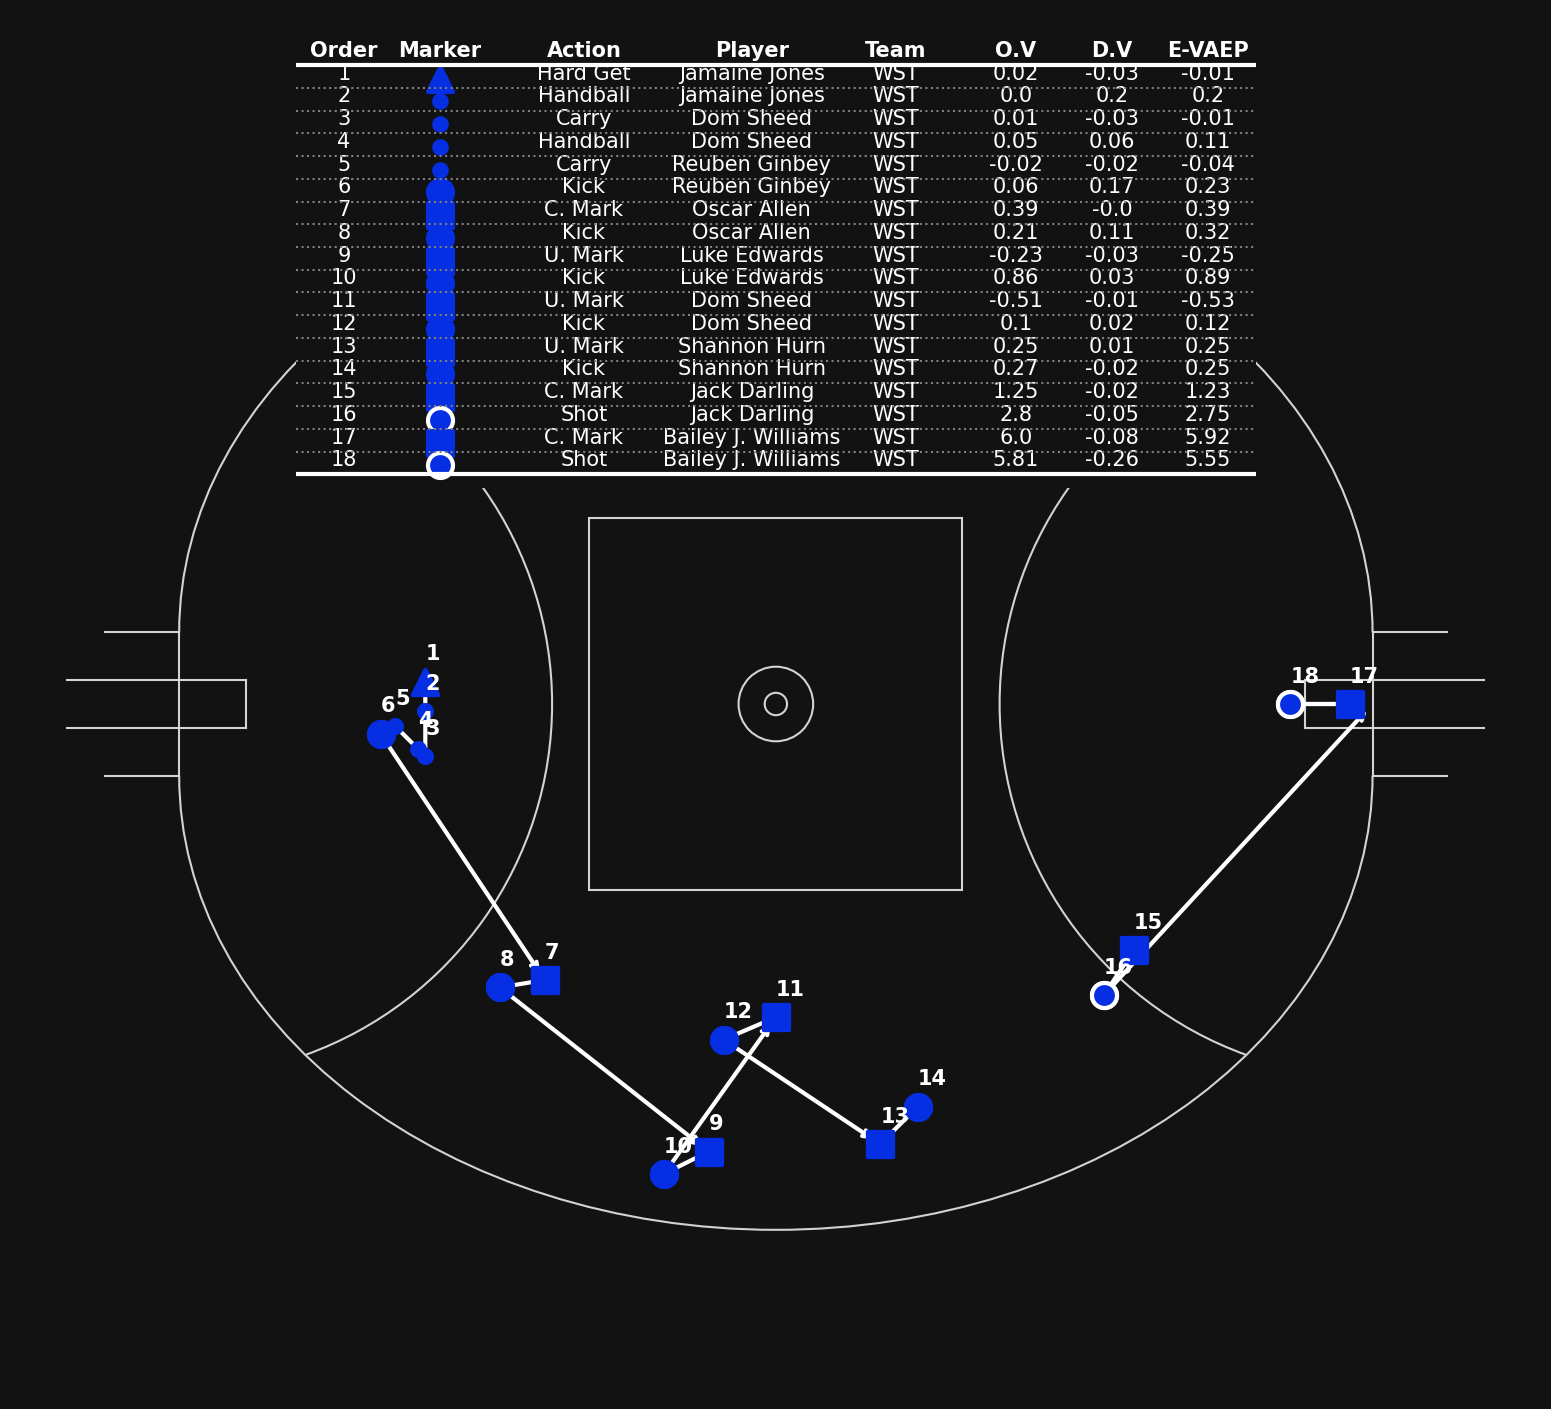

In [14]:
top_vaep_carry_actions = chain_data[(chain_data['action_type'] == "Contested Mark")].sort_values('exp_vaep_value', ascending = False).head(1)
match_id = top_vaep_carry_actions['Match_ID'].iloc[0]
chain_number = top_vaep_carry_actions['Chain_Number'].iloc[0]
chain = get_chain(chain_data, match_id, chain_number)
pitch_length, pitch_width = get_venue_dimensions(chain, match_id)

pitch = Pitch(pitch_width=pitch_width, pitch_length=pitch_length, line_width = 0.5)
fig, ax = pitch.draw()
ax = plot_chain_vaep(chain, pitch, ax=ax)
ax_table = add_chain_table_vaep(chain, fig, left=0.25, bottom=0.65, width=0.5, height=0.3)

# plt.savefig(
# 	"../figures/20230814_vaep_chain.png",
# 	dpi = 300,
# 	facecolor = "#121212",
# 	bbox_inches="tight",
#     edgecolor="none",
# 	transparent = False
# )